In [ ]:
pip install wandb

In [1]:
# Importing necessary libraries
from keras.datasets import fashion_mnist  # Importing Fashion MNIST dataset from Keras
import numpy as np  # Importing NumPy library for numerical operations
import matplotlib.pyplot as plt  # Importing Matplotlib library for plotting
import wandb
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import matplotlib
import seaborn as sns
import pandas

In [2]:
!wandb login 57566fbb0e091de2e298a4320d872f9a2b200d12

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\DELL\.netrc


In [3]:
wandb.init(project="DL_Assignment1", name="Question:1")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: cs23m026. Use `wandb login --relogin` to force relogin


# **Question-1**

In [4]:
#loading data set
(fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label) = fashion_mnist.load_data()
(mnist_train, mnist_train_label), (mnist_test, mnist_test_label) = mnist.load_data()


In [5]:
# Checking Dataset shape
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# type(x_train)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[1]))
# x_train.shape

def input_matrix(image):
    """
    Reshape and normalize input images.

    Parameters:
    - image: Input image

    Returns:
    - Reshaped and normalized input matrix
    """
    return image.reshape(image.shape[0], -1) / 255.0


In [6]:
# class labels for fashion mnist dataset
label_fahion_mnist = {
     0 :  "T-shirt/top",
     1 :  "Trouser",
     2 :  "Pullover",
     3 :  "Dress",
     4 :  "Coat",
     5 :  "Sandal",
     6 :  "Shirt",
     7 :  "Sneaker",
     8 :  "Bag",
     9 :  "Ankle boot"
}

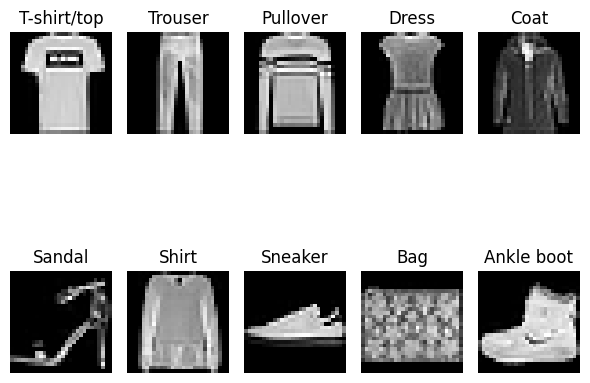

In [7]:
# Creating subplots to display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(6, 6))

# Iterating through each class
for i in range(len(label_fahion_mnist)):
    row = i // 5  # Calculating row index for subplot
    col = i % 5   # Calculating column index for subplot

    # Finding the index of the first image in the training set with label i
    idx = np.argmax(fashion_mnist_train_label == i)

    # Displaying the image corresponding to the label i
    axes[row, col].imshow(fashion_mnist_train[idx], cmap='gray')  # Displaying grayscale image
    axes[row, col].set_title(label_fahion_mnist[i])  # Setting title with class label
    axes[row, col].axis('off')  # Turning off axis

    # wandb.log({"Question1": [wandb.Image(fashion_mnist_train[idx], caption= label_fahion_mnist[i])]})

# Adjusting the layout to prevent overlapping
plt.tight_layout()

# Displaying the plot
plt.show()

In [8]:
wandb.finish()

# **Activation Functions**

In [25]:
""" Activation Class :- Contains various diffrent activations functions """
class Activation_Functions:
    def __init__(self) -> None:
        pass


    def sigmoid(self, x):
        # Compute sigmoid element-wise for each element of the matrix
        sigmoid_x = np.zeros_like(x)  # Initialize output matrix with zeros

        # Apply the sigmoid function element-wise
        positive = x >= 0
        negetive = ~positive
        sigmoid_x[positive] = 1.0 / (1.0 + np.exp(-x[positive]))
        sigmoid_x[negetive] = np.exp(x[negetive]) / (1.0 + np.exp(x[negetive]))

        return sigmoid_x


    def ReLU(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)



    def softmax(self, x):
        # Subtract the maximum value along the axis to prevent overflow
        max_x = np.max(x, axis=1, keepdims=True)
        exp_x = np.exp(x - max_x)

        # Compute softmax probabilities
        softmax_x = exp_x / np.sum(exp_x, axis=1, keepdims=True)

        return softmax_x

    def identity(self, x):
        return x



    def activation(self, x, fun):
        if fun == "tanh":
            return self.tanh(x)
        elif fun == "sigmoid":
            return self.sigmoid(x)
        elif fun == "ReLU":
            return self.ReLU(x)
        elif fun == "softmax":
            return self.softmax(x)
        elif fun == "identity":
            return self.identity(x)

# **Derivatives**

In [26]:
class Derivatives:
    def __init__(self) -> None:
        """
            Constructor method for Derivatives class.
            Initialization of object of Activation_Functions class
        """
        self.fun = Activation_Functions()  # Creating an instance of Activation_Functions class


    def sigmoid_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.sigmoid(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative

    def softmax_derivative(self, x):
        """
        Computes the derivative of the sigmoid activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the sigmoid activation function
        """
        g = self.fun.softmax(x)  # Computing sigmoid activation
        return g * (1 - g)  # Computing and returning derivative


    def tanh_derivative(self, x):
        """
        Computes the derivative of the hyperbolic tangent (tanh) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the tanh activation function
        """
        g = self.fun.tanh(x)  # Computing tanh activation
        return 1 - g * g  # Computing and returning derivative


    def ReLU_derivative(self, x):
        """
        Computes the derivative of the Rectified Linear Unit (ReLU) activation function.

        Parameters:
        - x: Input value

        Returns:
        - Derivative of the ReLU activation function
        """
        # g = self.fun.ReLU(x)  # Computing ReLU activation
        # return np.where(g > 0, 1, 0)  # Computing and returning derivative

        x[x>0]=1
        x[x<=0]=0
        return x

    def identity_derivative(self, x):
        x = 1
        return x


    def derivatives(self, x, activation_function):
        """
        Computes the derivative of a specified activation function.

        Parameters:
        - x: Input value
        - activation_function: Name of the activation function

        Returns:
        - Derivative of the specified activation function
        """
        if activation_function == "sigmoid":
            return self.sigmoid_derivative(x)  # Computing derivative for sigmoid activation
        elif activation_function == "tanh":
            return self.tanh_derivative(x)  # Computing derivative for tanh activation
        elif activation_function == "ReLU":
            return self.ReLU_derivative(x)  # Computing derivative for ReLU activation
        elif activation_function == "softmax":
            return self.softmax_derivative(x)
        elif activation_function == "identity":
            return self.identity_derivative(x)


# **Loss Functions**

In [27]:
class Loss_Function:
    def __init__(self) -> None:
        """
        Constructor method for Loss_Function class.
        Initializes the default loss function to cross-entropy.
        """
        self.default_loss_function = "cross_entropy"


    def compute_loss(self, y_true, y_hat, loss_function):
        """
        Computes the loss based on the given true labels and predicted probabilities.

        Parameters:
        - y_true: True labels (one-hot encoded)
        - y_hat: Predicted probabilities
        - loss_function: Name of the loss function to be used

        Returns:
        - Loss value
        """


        if loss_function == None:
            # If no loss function is specified, use the default loss function
            loss_function = self.default_loss_function

        if loss_function == "cross_entropy":
            # Set a small value of flag to avoid wrong values in log functions
            flag = 1e-15
            
            y_hat = np.clip(y_hat, flag, 1. - flag) # Clip the predicted values to avoid log(0) and log(1) 
            # Compute the cross-entropy loss for each sample
            loss = -np.sum(y_true * np.log(y_hat), axis=1)
            # Compute the mean loss across all samples
            loss = np.mean(loss)
            # Return the computed loss
            return loss

        if loss_function == "mean_squared_error":
            loss = (1/2) * np.sum((y_true-y_hat)**2) / (y_hat.shape[0])
            return loss


    def last_output_derivative(self, y_hat,y_true, activation_derivative, loss_function):

        # epsilon = 1e-15
        #     # Clip the predicted values to avoid log(0) and log(1) scenarios
        # y_hat = np.clip(y_hat, epsilon, 1. - epsilon)

        if(loss_function == "mean_squared_error"):
            # print(y_hat.shape, y_true.shape)
            return (y_hat - y_true)* activation_derivative/ len(y_true)

        if(loss_function == "cross_entropy"):
            return -(y_true - y_hat)



# **Question - 2**

In [28]:
class Network:
    def __init__(self, PARAM):
        """
        Constructor method for Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layers, output size)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store activations of each layer
        self.h = {}       # Dictionary to store outputs of each layer
        self.fun = Activation_Functions()  # Instance of Activation_Functions class
        self.size_list = [PARAM["input_size"]] + PARAM["hidden_layers"] + [PARAM["output_size"]]  # List containing sizes of all layers
        self.y_predictions = []  # List to store predicted probabilities for each input sample


    def initialize_parameters(self, initialization):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):
            if initialization == "random":
                self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
            elif initialization == "Xavier":
                inpt_w = self.size_list[layer-1]
                opt_w = self.size_list[layer]
                inpt_b = 1
                opt_b = self.size_list[layer]

                variance_w = 2.0/(inpt_w + opt_w)
                variance_b = 2.0/(inpt_b + opt_b)

                self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)  # Initializing biases with random values





    def forward_pass(self, x, activation_function):
        """
        Method to perform forward pass through the network.

        Parameters:
        - x: Input data
        - activation_function: Name of the activation function to be used

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        total_layer = len(self.size_list)
        self.h[0] = x  # Input layer

        for layer in range(1, total_layer-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing preactivation
            self.h[layer] = self.fun.activation(self.a[layer], fun=activation_function)  # Applying activation function

        self.a[total_layer-1] = np.dot(self.h[layer], self.weight[total_layer-1]) + self.bias[total_layer-1]  # Computing weighted sum for final layer
        self.h[total_layer-1] = self.fun.activation(self.a[total_layer-1], fun="softmax")  # Applying softmax activation

        return self.h[total_layer-1]  # Returning output of final layer


    def predict_probability(self, dataset, activation, init):
        """
        Method to predict probabilities for each input sample in the dataset.

        Parameters:
        - dataset: Input dataset
        - activation: Name of the activation function to be used

        Returns:
        - List containing predicted probabilities for each input sample
        """
        self.initialize_parameters(init)  # Initializing network parameters

        for image in dataset:
            x = image.reshape(1, -1) / 255.0  # Reshaping and normalizing input data
            y_hat = self.forward_pass(x, activation)  # Performing forward pass
            self.y_predictions.append(y_hat)  # Storing predicted probabilities

        return self.y_predictions  # Returning list of predicted probabilities



In [13]:
PARAM = {
    "input_size" : 784,            # Size of the input layer (number of input features)
    "hidden_layers" : [5, 6, 7],   # Sizes of hidden layers in the neural network
    "output_size" : 10             # Size of the output layer (number of classes)
}

n1 = Network(PARAM)  # Creating an instance of the Network class with the given parameters
y_pred = n1.predict_probability(fashion_mnist_train, "identity", "Xavier")  # Predicting probabilities for each sample in the training dataset using sigmoid activation function



In [14]:
np.set_printoptions(suppress=True)  # Suppressing scientific notation in printed arrays
print(y_pred[0])  # Printing the predicted probabilities for the first sample

[[0.04134263 0.07625954 0.05793034 0.10404176 0.05900329 0.28839418
  0.04497627 0.04729615 0.23108914 0.0496667 ]]


# **Question - 3**

# **Optimizers**

In [29]:
class Optimizer:
    def __init__(self, neural_network, PARAM) -> None:
        """
        Constructor method for Optimizer class.

        Parameters:
        - neural_network: Instance of the neural network class
        - PARAM: Dictionary containing optimization parameters (eta, weight_decay, optimizer, beta)
        """
        self.neural_network = neural_network  # Neural network object
        self.eta = PARAM["eta"]  # Learning rate
        self.weight_decay = PARAM["weight_decay"]  # Weight decay factor
        self.optimizer = PARAM["optimizer"]  # Optimization algorithm (sgd, momentum, nag, adam, nadam, rmsprop)
        self.beta = PARAM["beta"]  
        self.epsilon = PARAM["epsilon"] 
        self.beta2 = PARAM["beta2"] 
        self.beta1 = PARAM["beta1"]
        self.momentum = PARAM["momentum"] # Momentum factor for momentum-based optimization

    def stochastic_gradient_decent(self):
        """
        Method to perform stochastic gradient descent optimization.
        """
        weight_decay = self.weight_decay
        eta = self.eta

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.weight[layer] = self.neural_network.weight[layer] - eta * self.neural_network.grad_w[layer]  # Updating weights
            self.neural_network.bias[layer] = self.neural_network.bias[layer] - eta * self.neural_network.grad_b[layer]  # Updating biases

    def update(self, t):
        """
        Method to update network parameters based on the selected optimization algorithm.
        """
        if self.optimizer == "sgd":
            self.stochastic_gradient_decent()
        elif self.optimizer == "momentum":
            self.momentum_based_gradient_decent()
        elif self.optimizer == "nag":
            self.nesterov_accelerated_gradient_decent()
        elif self.optimizer == "rmsprop":
            self.rmsprop()
        elif self.optimizer == "adam":
            self.adam(t)
        elif self.optimizer == "nadam":
            self.nadam(t)


    def momentum_based_gradient_decent(self):
        """
        Method to perform momentum-based gradient descent optimization.
        """
        weight_decay = self.weight_decay

        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
                decay_wt = weight_decay * self.neural_network.weight[layer]  # Applying weight decay
                self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

                uw = self.momentum * self.neural_network.prv_w[layer] + self.eta * self.neural_network.grad_w[layer]  # Computing update for weights
                ub = self.momentum * self.neural_network.prv_b[layer] + self.eta * self.neural_network.grad_b[layer]  # Computing update for biases

                self.neural_network.weight[layer] -= uw  # Updating weights
                self.neural_network.bias[layer] -= ub  # Updating biases

                self.neural_network.prv_w[layer] = uw  # Storing previous weight update
                self.neural_network.prv_b[layer] = ub  # Storing previous bias update


    def nesterov_accelerated_gradient_decent(self):
        """
        Method to perform Nesterov Accelerated Gradient Descent optimization.
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients
            self.neural_network.prv_w[layer] = self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]

            self.neural_network.weight[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_w[layer] + self.neural_network.grad_w[layer]))
            self.neural_network.bias[layer] -= ((self.eta) * (self.momentum * self.neural_network.prv_b[layer] + self.neural_network.grad_b[layer]))

    def rmsprop(self):
        """
        Method to perform Root Mean Square Propogation optimization.
        """
        for layer in range(len(self.neural_network.size_list) - 1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta * self.neural_network.prv_w[layer] + (1 - self.beta) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv_b[layer] = self.beta * self.neural_network.prv_b[layer] + (1 - self.beta) * (self.neural_network.grad_b[layer] ** 2)

            self.neural_network.weight[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_w[layer] + self.epsilon))) * self.neural_network.grad_w[layer]
            self.neural_network.bias[layer] -= (self.eta / (np.sqrt(self.neural_network.prv_b[layer] + self.epsilon))) * self.neural_network.grad_b[layer]


    def adam(self, t):
        """
        Method to perform adam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]


            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * m_w_hat
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * m_b_hat


    def nadam(self, t):
        """
        Method to perform nadam optimizer.

        Parameter : t (denotes the time stamp in network)
        """
        for layer in range(len(self.neural_network.size_list)-1, 0, -1):
            decay_wt = self.weight_decay * self.neural_network.weight[layer]  # Applying weight decay
            self.neural_network.grad_w[layer] = self.neural_network.grad_w[layer] + decay_wt  # Adding weight decay to gradients

            self.neural_network.prv_w[layer] = self.beta1 * self.neural_network.prv_w[layer] + (1 - self.beta1) * self.neural_network.grad_w[layer]
            self.neural_network.prv_b[layer] = self.beta1 * self.neural_network.prv_b[layer] + (1 - self.beta1) * self.neural_network.grad_b[layer]

            self.neural_network.prv2_w[layer] = self.beta2 * self.neural_network.prv2_w[layer] + (1 - self.beta2) * (self.neural_network.grad_w[layer] ** 2)
            self.neural_network.prv2_b[layer] = self.beta2 * self.neural_network.prv2_b[layer] + (1 - self.beta2) * (self.neural_network.grad_b[layer] ** 2)

            m_w_hat = self.neural_network.prv_w[layer]/(1 - self.beta1**t)
            m_b_hat = self.neural_network.prv_b[layer]/(1 - self.beta1**t)

            v_w_hat = self.neural_network.prv2_w[layer]/(1 - self.beta2 ** t)
            v_b_hat = self.neural_network.prv2_b[layer]/(1 - self.beta2 ** t)

            self.neural_network.weight[layer] -= (self.eta/(np.sqrt(v_w_hat) + self.epsilon)) * (self.beta * m_w_hat + ((1 - self.beta1) * self.neural_network.grad_w[layer])/(1 - self.beta1 ** t))
            self.neural_network.bias[layer] -= (self.eta/(np.sqrt(v_b_hat) + self.epsilon)) * (self.beta * m_b_hat + ((1 - self.beta1) * self.neural_network.grad_b[layer])/(1 - self.beta1 ** t))










# **Neural Network**

In [30]:
class Neural_Network:
    def __init__(self, PARAM) -> None:
        """
        Constructor method for Neural_Network class.

        Parameters:
        - PARAM: Dictionary containing network parameters (input size, hidden layer sizes, output size,
                 activation function, training input, training output)
        """
        self.weight = {}  # Dictionary to store weights of each layer
        self.bias = {}    # Dictionary to store biases of each layer
        self.a = {}       # Dictionary to store preactivation of each layer
        self.h = {}       # Dictionary to store activations of each layer
        self.grad_w = {}  # Dictionary to store gradients of weights for each layer
        self.grad_b = {}  # Dictionary to store gradients of biases for each layer
        self.prv_w = {}   # Dictionary to store previous weights for momentum-based optimization
        self.prv_b = {}   # Dictionary to store previous biases for momentum-based optimization
        self.prv2_w = {}
        self.prv2_b = {}

        self.activation_function = PARAM["activation_function"]  # Activation function for hidden layers
        self.loss_function = PARAM["loss_function"]  # Activation function for hidden layers
        self.initialization = PARAM["init"] # initialization type
        self.hidden_layers = PARAM["hidden_layers"]
        self.hidden_layer_sizes = PARAM["hidden_layer_sizes"]
        self.dataset = PARAM["dataset"]
        
        self.act = Activation_Functions()  # Instance of Activation_Functions class
        self.derivative = Derivatives()     # Instance of Derivatives class
        self.loss = Loss_Function()         # instance of Loss_Function class

        

        if self.dataset == 'fashion_mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (fashion_mnist_train, fashion_mnist_train_label), (fashion_mnist_test, fashion_mnist_test_label)
        if self.dataset == 'mnist':
            (train_img, train_lbl), (test_img, test_lbl) = (mnist_train, mnist_train_label), (mnist_test, mnist_test_label)
        
        #train - test split 
        train_image, validation_image, train_label, validation_label = train_test_split(train_img, train_lbl, test_size= 0.1, random_state=41)
        
        # training data
        self.input = input_matrix(train_image)
        self.y_true = train_label

        # validation data
        self.val_img = input_matrix(validation_image)
        self.val_true = validation_label

        #testing data
        self.test_img = input_matrix(test_img)
        self.test_true = test_lbl

        self.size_list = [self.input.shape[1]] + [self.hidden_layer_sizes for _ in range(self.hidden_layers)] + [10]  # Sizes of all layers


    def initialize_parameters(self):
        """
        Method to initialize weights and biases of the network.
        """
        for layer in range(1, len(self.size_list)):

            self.prv_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero
            self.prv2_w[layer] = np.zeros((self.size_list[layer-1], self.size_list[layer]))  # Initializing previous weights for momentum-based optimization with zero
            self.prv2_b[layer] = np.zeros((1, self.size_list[layer]))  # Initializing previous biases for momentum-based optimization with zero

            for layer in range(1, len(self.size_list)):
                if self.initialization == "random":
                    self.weight[layer] = np.random.randn(self.size_list[layer-1], self.size_list[layer])  # Initializing weights with random values
                    self.bias[layer] = np.random.randn(1, self.size_list[layer])  # Initializing biases with random values
                    # print("Initialize with random")
                elif self.initialization == "Xavier":
                    inpt_w = self.size_list[layer-1]
                    opt_w = self.size_list[layer]
                    inpt_b = 1
                    opt_b = self.size_list[layer]

                    variance_w = 6.0/(inpt_w + opt_w)
                    variance_b = 6.0/(inpt_b + opt_b)

                    self.weight[layer] = np.random.randn(inpt_w, opt_w) * np.sqrt(variance_w) # Initializing weights with random values
                    self.bias[layer] = np.random.randn(inpt_b, opt_b) *np.sqrt(variance_b)

                    # print("Initialize with xavier")


    def forward_propagation(self, x):
        """
        Method to perform forward propagation through the network.

        Parameters:
        - x: Input data

        Returns:
        - Output of the final layer (after applying softmax activation)
        """
        self.h[0] = x  # Input layer
        for layer in range(1, len(self.size_list)-1):
            self.a[layer] = np.dot(self.h[layer-1], self.weight[layer]) + self.bias[layer]  # Computing weighted sum of inputs
            self.h[layer] = self.act.activation(self.a[layer], self.activation_function)  # Applying activation function
        self.a[layer+1] = np.dot(self.h[layer], self.weight[layer+1]) + self.bias[layer+1]  # Computing weighted sum for final layer
        self.h[layer+1] = self.act.activation(self.a[layer+1], "softmax")  # Applying softmax activation
        return self.h[layer+1]  # Returning output of final layer


    def backward_propagation(self, input, y_true, y_hat):
        """
        Method to perform backward propagation through the network.

        Parameters:
        - input: Input data
        - y_true: True labels
        - y_hat: Predicted probabilities

        Returns:
        - Gradients of weights and biases
        """

        activation_derivative = self.derivative.derivatives(self.a[len(self.size_list) - 1], "softmax")
        error_wrt_output = self.loss.last_output_derivative(y_hat, y_true, activation_derivative, self.loss_function)

        for layer in range(len(self.size_list)-1, 1, -1):
            self.grad_w[layer] = np.dot(self.h[layer-1].T, error_wrt_output)  # Computing gradients of weights
            self.grad_b[layer] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases

            error_wrt_hidden = np.dot(error_wrt_output, self.weight[layer].T)  # Computing error with respect to hidden layer
            error_wrt_output = error_wrt_hidden * self.derivative.derivatives(self.a[layer-1], self.activation_function)  # Computing error with respect to output of hidden layer

        self.grad_w[1] = np.dot(input.T, error_wrt_output)  # Computing gradients of weights for input layer
        self.grad_b[1] = np.sum(error_wrt_output, axis=0, keepdims=True)  # Computing gradients of biases for input layer

        return self.grad_w, self.grad_b  # Returning gradients of weights and biases


    def one_hot_vector(self, y_true):
        """
        Method to convert true labels into one-hot vectors.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot vector representation of true labels
        """
        vec = np.zeros(10)  # Initializing one-hot vector
        vec[y_true] = 1  # Setting the corresponding index to 1
        return vec


    def one_hot_matrix(self, y_true):
        """
        Method to convert true labels into one-hot matrices.

        Parameters:
        - y_true: True labels

        Returns:
        - One-hot matrix representation of true labels
        """
        row = y_true.shape[0]  # Number of samples
        col = 10  # Number of classes
        mat = np.zeros((row, col))  # Initializing one-hot matrix
        for i in range(row):
            mat[i][y_true[i]] = 1  # Setting the corresponding index to 1
        return mat


# Train Model

In [31]:
class Train_Model:
    def __init__(self, neural_network, optimizer, log, console = 1) -> None:
        """
        Constructor method for Train_Model class.

        Parameters:
        - PARAM_NEURAL_NETWORK: Dictionary containing parameters for the neural network
        - PARAM_OPTIMIZER: Dictionary containing parameters for the optimizer
        """
        self.neural_network =neural_network  # Neural network instance
        self.optimizer = optimizer  # Optimizer instance
        self.loss = Loss_Function()  # Loss function instance
        self.wan_log = log          
        self.console_log = console

    def compute_performance(self, data, label):
        """
            Method to compute loss and accuracy
            Parameters :
                data : predicted class
                label : true class
            Returns:
                loss, accuracy (in %)
        """
        y_predictions = self.neural_network.forward_propagation(data)
        #creating one hot matrix true data
        labels = self.neural_network.one_hot_matrix(label)
        # accuracy calculation
        accuracy = np.sum(np.argmax(y_predictions, axis=1) == np.argmax(labels, axis = 1))
        #loss calculation
        loss = self.loss.compute_loss(labels, y_predictions, self.neural_network.loss_function)
        return loss, (accuracy/len(data)) * 100

    def predict_prob(self, data):
        """
            Method to compute loss and accuracy
            Parameters :
                data : image
            Returns:
                predicted probabilities assigned to each class
        """
        y_predictions = self.neural_network.forward_propagation(data)
        return y_predictions

    def fit_data(self, batch_size, epochs):
        """
        Method to train the model on the given dataset.

        Parameters:
        - batch_size: Size of each batch
        - epochs: Number of epochs for training
        """
        self.neural_network.initialize_parameters()  # Initializing parameters of the neural network
        total_batches = int(np.ceil(self.neural_network.input.shape[0] / batch_size))  # Total number of batches
        for i in range(epochs):
            t = 1
            for batch in range(total_batches):
                batch_start = batch * batch_size  # Starting index of the batch
                batch_end = batch_start + batch_size  # Ending index of the batch
                image_set = self.neural_network.input[batch_start : batch_end]  # Extracting batch of input images
                res_set = self.neural_network.y_true[batch_start : batch_end]  # Extracting batch of true labels


                y_hat = self.neural_network.forward_propagation(image_set)  # Forward propagation
                res = self.neural_network.one_hot_matrix(res_set)  # Converting true labels into one-hot matrices
                grad_w , grad_b = self.neural_network.backward_propagation(image_set, res, y_hat)  # Backward propagation

                for layer in range(1, len(self.neural_network.size_list)):
                    self.neural_network.grad_w[layer] = grad_w[layer]/batch_size  # Normalizing gradients of weights
                    self.neural_network.grad_b[layer] = grad_b[layer]/batch_size  # Normalizing gradients of biases

                self.optimizer.update(t)  # Updating weights and biases using optimizer
                t += 1

            t_loss, t_acc = self.compute_performance(self.neural_network.input, self.neural_network.y_true)
            v_loss, v_acc = self.compute_performance(self.neural_network.val_img, self.neural_network.val_true)

            if self.wan_log == 1:
                wandb.log({
                    'epoch' : i+1,
                    'training-loss' : t_loss,
                    'training-accuracy' : t_acc,
                    'validation-loss' : v_loss,
                    'validation-accuracy' : v_acc,

                })

            if self.console_log == 1:
                print(f"epoch:{i+1} :: \n Training-loss : {t_loss}, Training-accuracy:{t_acc}%")    # Printing loss and accuracy for each epoch
                print(f"Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%\n\n")    # Printing loss and accuracy for each epoch


        return t_loss, t_acc, v_loss, v_acc




# **Training & Testing**

In [32]:

PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 128,
    "activation_function": "sigmoid", # sigmoid, tanh, ReLU
    "dataset" : "fashion_mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

PARAM_OPTIMIZER = {
    "eta": 0.0005,
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0.0005,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

neural_network = Neural_Network(PARAM_NEURAL_NETWORK)
optimizer = Optimizer(neural_network, PARAM_OPTIMIZER)

my_model = Train_Model(neural_network, optimizer, log = 0)
my_model.fit_data(batch_size=64, epochs=5)


epoch:1 :: 
 Training-loss : 1.1205762077969905, Training-accuracy:56.81481481481482%
Validation-loss : 1.1308631090462027, Validation-accuracy:56.49999999999999%


epoch:2 :: 
 Training-loss : 0.772257620525256, Training-accuracy:69.73333333333333%
Validation-loss : 0.7901648768125049, Validation-accuracy:68.41666666666667%


epoch:3 :: 
 Training-loss : 0.6521309884625998, Training-accuracy:75.62037037037037%
Validation-loss : 0.6724369353510462, Validation-accuracy:74.5%


epoch:4 :: 
 Training-loss : 0.5953523569943155, Training-accuracy:77.76481481481483%
Validation-loss : 0.6177301144282841, Validation-accuracy:76.95%


epoch:5 :: 
 Training-loss : 0.5261133841873208, Training-accuracy:81.33148148148149%
Validation-loss : 0.5465387108013967, Validation-accuracy:80.10000000000001%




(0.5261133841873208, 81.33148148148149, 0.5465387108013967, 80.10000000000001)

In [20]:
# testing 

test_data = input_matrix(fashion_mnist_test)
y_pred1 = my_model.neural_network.forward_propagation(test_data)
# y_pred2 = n2.forward_propogation(test_data, "tanh")
accuracy1 = np.mean(np.argmax(y_pred1, axis = 1) == fashion_mnist_test_label)
# accuracy2 = np.mean(np.argmax(y_pred2, axis = 1) == y_train)

print(accuracy1)
print(np.unique(np.argmax(y_pred1, axis = 1)))

0.6167
[0 1 2 3 4 5 7 8 9]


# **Question 4**

In [21]:
sweep_config = {
    'method' : 'random',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_random_final',

    'parameters' : {
        'epochs' : {'values' : [5, 10]},
        'activation' : {'values' : ['identity', 'tanh', 'sigmoid', 'ReLU']},
        'batch_size' : {'values' : [32, 64, 128]},
        'optimizer' : {'values' : ['momentum','sgd', 'nag', 'nadam', 'adam', 'rmsprop']},
        'weight_decay': {'values': [0, 0.0005]},
        'hidden_layer_sizes' : {'values' : [32, 64, 128]},
        'beta': {'values': [0.5, 0.9]}, #rmsprop
        'beta1' : {'values' : [0.9, 0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [0.0005]},
        'initialization':{'values': ['Xavier', 'random']},
        'hidden_layers': {'values': [3, 4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6, 1e-8]},
        'momentum' : {'values' : [0.5, 0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [22]:
def train():
    var1 = wandb.init(project="DL_Assignment1")
    var2 = var1.config

    # wandb.run.name = 'Optimizer:- ' + var2.optimizer + ' Epoch:- ' + str(var2.epochs) + " Avtivation_Function :- " + var2.activation + " Batch_Size :- " + str(var2.batch_size) + " Initialization :- " + var2.initialization + \
    #                 ' layers:-' + str(len(var2.hidden_layers)) +' decay:-' + str(var2.weight_decay) + ' beta:-' + str(var2.beta) + ' learning_rate:-' + str(var2.learning_rate) + \
    #                 ' beta2 :- ' + str(var2.beta)

    wandb.run.name = f"hl_{var2.hidden_layers}_bs_{var2.batch_size}_e_{var2.epochs}_act_{var2.activation}_eta_{var2.learning_rate}_err_{var2.loss_function}_init_{var2.initialization}_hls_{var2.hidden_layer_sizes}_dataset_{var2.dataset}"

    PARAM_NEURAL_NETWORK = {
        "hidden_layers": var2.hidden_layers,
        "hidden_layer_sizes" : var2.hidden_layer_sizes,
        "activation_function": var2.activation, # sigmoid, tanh, ReLU
        "loss_function" : var2.loss_function, # mean_squared_error, cross_entropy
        "init" : var2.initialization, #random, xavier
        "dataset" : var2.dataset
    }

    PARAM_OPTIMIZER = {
        "eta": var2.learning_rate,
        "optimizer": var2.optimizer, #sgd, momentum, adam, nadam, rmsprop, nag
        "beta": var2.beta,
        "weight_decay": var2.weight_decay,
        "epsilon": var2.epsilon,
        "beta2" : var2.beta2,
        "beta1" : var2.beta1,
        "momentum" : var2.momentum
    }

    neural_network1 = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer1 = Optimizer(neural_network1, PARAM_OPTIMIZER)

    my_model1 = Train_Model(neural_network1, optimizer1, log = 1,console=0)
    t_loss, t_acc, v_loss, v_acc = my_model1.fit_data(batch_size=var2.batch_size, epochs=var2.epochs)

    print(f"Training-loss : {t_loss}, Training-accuracy:{t_acc}%, Validation-loss : {v_loss}, Validation-accuracy:{v_acc}%")    # Printing loss and accuracy for each epoch
    loss, accuracy = my_model1.compute_performance(neural_network1.val_img, neural_network1.val_true)
    print(loss, accuracy)
    wandb.log({"Accuracy" : accuracy})


In [23]:
sweep_id = wandb.sweep(sweep_config, project="DL_Assignment1")

Create sweep with ID: 9th2n9yw
Sweep URL: https://wandb.ai/cs23m026/DL_Assignment1/sweeps/9th2n9yw


In [24]:
wandb.agent(sweep_id, train, count = 250)
wandb.finish()

wandb: Agent Starting Run: brbbph5m with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5931652073304327, Training-accuracy:11.87037037037037%, Validation-loss : 0.5954903931415971, Validation-accuracy:11.366666666666667%
0.5954903931415971 11.366666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▂▆▆███▆▇
training-loss,█▇▆▆▅▄▃▃▂▁
validation-accuracy,███▅▅▁▅▅▅▅
validation-loss,█▇▆▆▅▄▃▃▂▁
Accuracy,11.36667
epoch,10
training-accuracy,11.87037
training-loss,0.59317
validation-accuracy,11.36667


wandb: Agent Starting Run: naprsnv1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.2980873801759715, Training-accuracy:61.55555555555555%, Validation-loss : 0.30295837299759093, Validation-accuracy:60.38333333333333%
0.30295837299759093 60.38333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▇█
training-loss,█▆▄▂▁
validation-accuracy,▁▃▅▇█
validation-loss,█▆▄▂▁
Accuracy,60.38333
epoch,5
training-accuracy,61.55556
training-loss,0.29809
validation-accuracy,60.38333


wandb: Agent Starting Run: gsy0jiod with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.8604086016418453, Training-accuracy:67.96666666666667%, Validation-loss : 2.921396068307069, Validation-accuracy:67.4%
2.921396068307069 67.4


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▅█▅█▁
training-loss,█▄▃▁▁
validation-accuracy,▅▇▅█▁
validation-loss,█▄▃▁▁
Accuracy,67.4
epoch,5
training-accuracy,67.96667
training-loss,2.86041
validation-accuracy,67.4


wandb: Agent Starting Run: rpckepsy with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8339730501656839, Training-accuracy:70.2462962962963%, Validation-loss : 0.8461334946565587, Validation-accuracy:69.58333333333333%
0.8461334946565587 69.58333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▃▄▅▅▇▇██
training-loss,█▅▄▃▂▂▁▁▁▁
validation-accuracy,▁▃▃▄▄▅▇▇██
validation-loss,█▅▄▃▂▂▁▁▁▁
Accuracy,69.58333
epoch,10
training-accuracy,70.2463
training-loss,0.83397
validation-accuracy,69.58333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ieup8ff1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.38370518514294955, Training-accuracy:86.55925925925926%, Validation-loss : 0.39075446398402347, Validation-accuracy:85.8%
0.39075446398402347 85.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▇▇████
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▅▆▇▇▇████
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,85.8
epoch,10
training-accuracy,86.55926
training-loss,0.38371
validation-accuracy,85.8


wandb: Agent Starting Run: w17e0hco with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.9408222170546434, Training-accuracy:43.71666666666666%, Validation-loss : 3.0170440892311636, Validation-accuracy:43.2%
3.0170440892311636 43.2


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▃▂▁
Accuracy,43.2
epoch,5
training-accuracy,43.71667
training-loss,2.94082
validation-accuracy,43.2


wandb: Agent Starting Run: t609q1g1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 3.2332510563005545, Training-accuracy:27.064814814814813%, Validation-loss : 3.1467445366751385, Validation-accuracy:26.98333333333333%
3.1467445366751385 26.98333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▆█
training-loss,█▅▃▂▁
validation-accuracy,▁▃▅▆█
validation-loss,█▅▃▂▁
Accuracy,26.98333
epoch,5
training-accuracy,27.06481
training-loss,3.23325
validation-accuracy,26.98333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: izwyp5z3 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.794313593196667, Training-accuracy:79.7462962962963%, Validation-loss : 7.177251974352534, Validation-accuracy:78.46666666666667%
7.177251974352534 78.46666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▅▇▆█▇▇▆█
training-loss,█▄▄▂▃▂▂▂▃▁
validation-accuracy,▁▅▆█▆█▇▇▅█
validation-loss,█▄▃▂▃▂▂▂▄▁
Accuracy,78.46667
epoch,10
training-accuracy,79.7463
training-loss,6.79431
validation-accuracy,78.46667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3l2uxb6s with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3998382427039714, Training-accuracy:35.13333333333333%, Validation-loss : 0.4036891523126686, Validation-accuracy:34.63333333333333%
0.4036891523126686 34.63333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▃▄▆▆▇▇██
training-loss,█▆▅▄▃▂▂▂▁▁
validation-accuracy,▁▁▃▄▆▆▇▇██
validation-loss,█▆▅▄▃▂▂▂▁▁
Accuracy,34.63333
epoch,10
training-accuracy,35.13333
training-loss,0.39984
validation-accuracy,34.63333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: egk65uu7 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4607881940720944, Training-accuracy:84.37777777777778%, Validation-loss : 0.47462230303736447, Validation-accuracy:83.53333333333333%
0.47462230303736447 83.53333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▆█▆▇██
training-loss,█▃▂▁▂▁▁▂▁▁
validation-accuracy,▁▆▆▇▇▇▆▆██
validation-loss,█▃▂▁▂▁▁▂▁▁
Accuracy,83.53333
epoch,10
training-accuracy,84.37778
training-loss,0.46079
validation-accuracy,83.53333


wandb: Agent Starting Run: h10ptkly with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001481481481481, Training-accuracy:9.985185185185186%, Validation-loss : 0.8986666666666666, Validation-accuracy:10.133333333333333%
0.8986666666666666 10.133333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▇▁█▁▁
training-loss,▂█▁██
validation-accuracy,█▁▆▂▂
validation-loss,▁█▃▇▇
Accuracy,10.13333
epoch,5
training-accuracy,9.98519
training-loss,0.90015
validation-accuracy,10.13333


wandb: Agent Starting Run: dcwndwfd with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4515883612252915, Training-accuracy:16.155555555555555%, Validation-loss : 0.4515955215307527, Validation-accuracy:15.683333333333332%
0.4515955215307527 15.683333333333332


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▃▅█
training-loss,█▄▂▁▁
validation-accuracy,▁▃▃▅█
validation-loss,█▄▂▁▁
Accuracy,15.68333
epoch,5
training-accuracy,16.15556
training-loss,0.45159
validation-accuracy,15.68333


wandb: Agent Starting Run: n6hmhcit with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.28478820434578084, Training-accuracy:89.55%, Validation-loss : 0.3195160782643186, Validation-accuracy:88.88333333333334%
0.3195160782643186 88.88333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▅▆█
validation-loss,█▅▄▂▁
Accuracy,88.88333
epoch,5
training-accuracy,89.55
training-loss,0.28479
validation-accuracy,88.88333


wandb: Agent Starting Run: zoy76yh5 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8184467339213833, Training-accuracy:9.518518518518519%, Validation-loss : 0.8135333496124834, Validation-accuracy:9.883333333333333%
0.8135333496124834 9.883333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▃▁▁▃█▇▇▆▆▆
training-loss,█▇▇▆▅▄▄▃▂▁
validation-accuracy,▁▁▃▄▃▄▄▅▆█
validation-loss,█▇▇▆▅▄▄▃▂▁
Accuracy,9.88333
epoch,10
training-accuracy,9.51852
training-loss,0.81845
validation-accuracy,9.88333


wandb: Agent Starting Run: mnvmr0zo with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9008888888888866, Training-accuracy:9.911111111111111%, Validation-loss : 0.8919999999999998, Validation-accuracy:10.8%
0.8919999999999998 10.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,▁▁▁▁▁▁▁▁▁▁
Accuracy,10.8
epoch,10
training-accuracy,9.91111
training-loss,0.90089
validation-accuracy,10.8


wandb: Agent Starting Run: sh8ow0ft with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45016160351881745, Training-accuracy:10.018518518518519%, Validation-loss : 0.4501483114193211, Validation-accuracy:9.833333333333332%
0.4501483114193211 9.833333333333332


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁█████████
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,█▁▁▁▁▁▁▁▁▁
validation-loss,█▅▄▃▃▂▂▂▁▁
Accuracy,9.83333
epoch,10
training-accuracy,10.01852
training-loss,0.45016
validation-accuracy,9.83333


wandb: Agent Starting Run: yj26bc4c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.246138567461838, Training-accuracy:17.125925925925927%, Validation-loss : 2.2494686847256165, Validation-accuracy:16.8%
2.2494686847256165 16.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▃▅█
training-loss,█▅▃▂▁
validation-accuracy,▁▂▃▅█
validation-loss,█▅▃▂▁
Accuracy,16.8
epoch,5
training-accuracy,17.12593
training-loss,2.24614
validation-accuracy,16.8


wandb: Agent Starting Run: evhj79lo with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 4.891518768465162, Training-accuracy:42.43888888888889%, Validation-loss : 5.19286450363367, Validation-accuracy:40.483333333333334%
5.19286450363367 40.483333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▆▇▇██
training-loss,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▄▅▆▆▇▇██
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,40.48333
epoch,10
training-accuracy,42.43889
training-loss,4.89152
validation-accuracy,40.48333


wandb: Agent Starting Run: f1nwrjct with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.08631213975514447, Training-accuracy:88.25185185185185%, Validation-loss : 0.09256546721239654, Validation-accuracy:87.28333333333333%
0.09256546721239654 87.28333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,87.28333
epoch,10
training-accuracy,88.25185
training-loss,0.08631
validation-accuracy,87.28333


wandb: Agent Starting Run: ws4crkoj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 3.8189352090077, Training-accuracy:37.35740740740741%, Validation-loss : 3.9482830933087225, Validation-accuracy:35.91666666666667%
3.9482830933087225 35.91666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▃▆▇█
validation-loss,█▅▃▂▁
Accuracy,35.91667
epoch,5
training-accuracy,37.35741
training-loss,3.81894
validation-accuracy,35.91667


wandb: Agent Starting Run: 3lqyok5e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.3015469258834096, Training-accuracy:18.52037037037037%, Validation-loss : 2.301792867836298, Validation-accuracy:17.433333333333334%
2.301792867836298 17.433333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▂▆██
training-loss,█▄▃▂▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▂▆██
validation-loss,█▄▃▂▁▁▁▁▁▁
Accuracy,17.43333
epoch,10
training-accuracy,18.52037
training-loss,2.30155
validation-accuracy,17.43333


wandb: Agent Starting Run: bp212ym2 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.474650756115734, Training-accuracy:83.38703703703703%, Validation-loss : 0.49066623337053256, Validation-accuracy:82.66666666666667%
0.49066623337053256 82.66666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▄▃▃▂▂▂▁▁▁
Accuracy,82.66667
epoch,10
training-accuracy,83.38704
training-loss,0.47465
validation-accuracy,82.66667


wandb: Agent Starting Run: 6ynk5gb8 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.76437575589498, Training-accuracy:74.00925925925927%, Validation-loss : 6.950983658176129, Validation-accuracy:73.86666666666667%
6.950983658176129 73.86666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇█▇▇█▆
training-loss,█▆▅▄▃▂▂▂▁▁
validation-accuracy,▁▄▆███▇▇█▇
validation-loss,█▆▅▃▃▂▂▂▁▁
Accuracy,73.86667
epoch,10
training-accuracy,74.00926
training-loss,6.76438
validation-accuracy,73.86667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: yo3oa1r2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 3.5943464161184306, Training-accuracy:75.61296296296295%, Validation-loss : 4.078812195344466, Validation-accuracy:74.28333333333333%
4.078812195344466 74.28333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▆▆▆▆▄▆█
training-loss,█▇▆▅▄▃▂▃▂▁
validation-accuracy,▁▃▄▆▅▅▆▄▅█
validation-loss,█▇▆▅▄▃▂▃▂▁
Accuracy,74.28333
epoch,10
training-accuracy,75.61296
training-loss,3.59435
validation-accuracy,74.28333


wandb: Agent Starting Run: oafylc7a with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003518518518518, Training-accuracy:9.964814814814815%, Validation-loss : 0.897, Validation-accuracy:10.299999999999999%
0.897 10.299999999999999


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▇█▃▇▁▁▁▁▁▁
training-loss,▂▁▆▂██████
validation-accuracy,██▂█▁▁▁▁▁▁
validation-loss,▁▁▇▁██████
Accuracy,10.3
epoch,10
training-accuracy,9.96481
training-loss,0.90035
validation-accuracy,10.3


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0xv8ybot with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5047485827803885, Training-accuracy:9.45%, Validation-loss : 0.5063454585342231, Validation-accuracy:9.0%
0.5063454585342231 9.0


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▂▄▆█
validation-loss,█▆▄▃▁
Accuracy,9.0
epoch,5
training-accuracy,9.45
training-loss,0.50475
validation-accuracy,9.0


wandb: Agent Starting Run: a19v8gmg with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8998148148148148, Training-accuracy:10.018518518518519%, Validation-loss : 0.9016666666666666, Validation-accuracy:9.833333333333332%
0.9016666666666666 9.833333333333332


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▁▁▁▁▁▁▁▁▁
training-loss,▁█████████
validation-accuracy,█▁▁▁▁▁▁▁▁▁
validation-loss,▁█████████
Accuracy,9.83333
epoch,10
training-accuracy,10.01852
training-loss,0.89981
validation-accuracy,9.83333


wandb: Agent Starting Run: sjsrolrf with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.899537037037037, Training-accuracy:10.046296296296296%, Validation-loss : 0.9041666666666667, Validation-accuracy:9.583333333333334%
0.9041666666666667 9.583333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁████
training-loss,█▁▁▁▁
validation-accuracy,█▁▁▁▁
validation-loss,▁████
Accuracy,9.58333
epoch,5
training-accuracy,10.0463
training-loss,0.89954
validation-accuracy,9.58333


wandb: Agent Starting Run: yfq1yc5q with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9004314796058543, Training-accuracy:9.955555555555556%, Validation-loss : 0.8971445127305814, Validation-accuracy:10.283333333333333%
0.8971445127305814 10.283333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▇█▁▁▁▁▁▁▁▁
training-loss,▂▁████████
validation-accuracy,▇█▁▁▁▁▁▁▁▁
validation-loss,▂▁████████
Accuracy,10.28333
epoch,10
training-accuracy,9.95556
training-loss,0.90043
validation-accuracy,10.28333


wandb: Agent Starting Run: urertg4c with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4076157725733656, Training-accuracy:85.34814814814816%, Validation-loss : 0.44095178584204425, Validation-accuracy:83.8%
0.44095178584204425 83.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▅▇██
validation-loss,█▄▂▁▁
Accuracy,83.8
epoch,5
training-accuracy,85.34815
training-loss,0.40762
validation-accuracy,83.8


wandb: Agent Starting Run: 22p10yv1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7843436265291227, Training-accuracy:7.287037037037038%, Validation-loss : 0.7793753115432884, Validation-accuracy:7.75%
0.7793753115432884 7.75


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▆█
training-loss,█▆▅▃▁
validation-accuracy,▃▂▁▅█
validation-loss,█▆▅▃▁
Accuracy,7.75
epoch,5
training-accuracy,7.28704
training-loss,0.78434
validation-accuracy,7.75


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: mr5l30pv with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5284568608155104, Training-accuracy:81.25185185185185%, Validation-loss : 0.5368891212935016, Validation-accuracy:80.71666666666667%
0.5368891212935016 80.71666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,80.71667
epoch,5
training-accuracy,81.25185
training-loss,0.52846
validation-accuracy,80.71667


wandb: Agent Starting Run: namlxcnf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4348324075382687, Training-accuracy:24.49074074074074%, Validation-loss : 0.4363054409367091, Validation-accuracy:23.933333333333334%
0.4363054409367091 23.933333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▄▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▂▄▇█
validation-loss,█▄▂▂▁
Accuracy,23.93333
epoch,5
training-accuracy,24.49074
training-loss,0.43483
validation-accuracy,23.93333


wandb: Agent Starting Run: xudhm8cs with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4500792241156601, Training-accuracy:9.983333333333333%, Validation-loss : 0.45007746038629737, Validation-accuracy:10.15%
0.45007746038629737 10.15


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,██▅▁▁▁▁▁▁▁
training-loss,▁▄▇███████
validation-accuracy,██▅▁▁▁▁▁▁▁
validation-loss,▁▄▇███████
Accuracy,10.15
epoch,10
training-accuracy,9.98333
training-loss,0.45008
validation-accuracy,10.15


wandb: Agent Starting Run: xeyedw51 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.62252516616246, Training-accuracy:77.92592592592592%, Validation-loss : 7.984213809956853, Validation-accuracy:76.88333333333334%
7.984213809956853 76.88333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆██
training-loss,█▄▃▁▁
validation-accuracy,▁▆▇██
validation-loss,█▃▂▁▁
Accuracy,76.88333
epoch,5
training-accuracy,77.92593
training-loss,7.62253
validation-accuracy,76.88333


wandb: Agent Starting Run: 68ki1n6e with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


C:\Users\DELL\AppData\Local\Temp\ipykernel_7992\862281975.py:30: RuntimeWarning: invalid value encountered in subtract
  exp_x = np.exp(x - max_x)


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: d2wazrlx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.37208516190459745, Training-accuracy:86.68333333333334%, Validation-loss : 0.39205266963328406, Validation-accuracy:86.0%
0.39205266963328406 86.0


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆██
validation-loss,█▅▃▂▁
Accuracy,86.0
epoch,5
training-accuracy,86.68333
training-loss,0.37209
validation-accuracy,86.0


wandb: Agent Starting Run: wof1vi7p with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9411751049924634, Training-accuracy:69.85555555555555%, Validation-loss : 1.015970425863029, Validation-accuracy:69.01666666666667%
1.015970425863029 69.01666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▅▇█
training-loss,█▃▂▁▁
validation-accuracy,▁▅▆▇█
validation-loss,█▃▂▁▁
Accuracy,69.01667
epoch,5
training-accuracy,69.85556
training-loss,0.94118
validation-accuracy,69.01667


wandb: Agent Starting Run: 3avf5tkm with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8819725954515284, Training-accuracy:11.801851851851852%, Validation-loss : 0.8726662798911942, Validation-accuracy:12.733333333333333%
0.8726662798911942 12.733333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▃▄█
training-loss,██▆▅▁
validation-accuracy,▂▁▃▄█
validation-loss,▇█▆▅▁
Accuracy,12.73333
epoch,5
training-accuracy,11.80185
training-loss,0.88197
validation-accuracy,12.73333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: hom6tj29 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.3575474594248305, Training-accuracy:10.783333333333333%, Validation-loss : 2.3871765179603615, Validation-accuracy:10.05%
2.3871765179603615 10.05


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▂▁▁▁▂▂▂▂▂
training-loss,█▂▁▁▁▁▁▁▁▁
validation-accuracy,█▅▁▂▁▁▂▂▃▂
validation-loss,█▂▁▁▁▁▁▁▁▁
Accuracy,10.05
epoch,10
training-accuracy,10.78333
training-loss,2.35755
validation-accuracy,10.05


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qj7qap9l with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4508418788336077, Training-accuracy:9.985185185185186%, Validation-loss : 0.45081970578667446, Validation-accuracy:10.133333333333333%
0.45081970578667446 10.133333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,10.13333
epoch,10
training-accuracy,9.98519
training-loss,0.45084
validation-accuracy,10.13333


wandb: Agent Starting Run: tm5z29as with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.40237045862737086, Training-accuracy:85.48703703703704%, Validation-loss : 0.4166573713019144, Validation-accuracy:84.61666666666666%
0.4166573713019144 84.61666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆██
validation-loss,█▄▃▁▁
Accuracy,84.61667
epoch,5
training-accuracy,85.48704
training-loss,0.40237
validation-accuracy,84.61667


wandb: Agent Starting Run: ixrduzn4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.32859282305370974, Training-accuracy:88.20185185185186%, Validation-loss : 0.3643699890111402, Validation-accuracy:86.88333333333334%
0.3643699890111402 86.88333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▆▄▄▃▂▂▂▁▁
validation-accuracy,▁▃▄▆▆▇▇▇██
validation-loss,█▅▄▃▃▂▂▂▁▁
Accuracy,86.88333
epoch,10
training-accuracy,88.20185
training-loss,0.32859
validation-accuracy,86.88333


wandb: Agent Starting Run: wk4ha95w with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.30745205311882245, Training-accuracy:57.95370370370371%, Validation-loss : 0.3069020177701342, Validation-accuracy:57.616666666666674%
0.3069020177701342 57.616666666666674


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▅▆▆▇██
training-loss,█▆▅▄▄▃▂▂▁▁
validation-accuracy,▁▃▄▅▅▆▆▇██
validation-loss,█▆▅▄▃▃▂▂▁▁
Accuracy,57.61667
epoch,10
training-accuracy,57.9537
training-loss,0.30745
validation-accuracy,57.61667


wandb: Agent Starting Run: 8ted6kmj with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.46935846806748, Training-accuracy:54.94259259259259%, Validation-loss : 1.523661021993984, Validation-accuracy:54.41666666666667%
1.523661021993984 54.41666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▂▁▁
Accuracy,54.41667
epoch,5
training-accuracy,54.94259
training-loss,1.46936
validation-accuracy,54.41667


wandb: Agent Starting Run: wppnbppm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5163636922203307, Training-accuracy:81.70185185185184%, Validation-loss : 0.5361919118568432, Validation-accuracy:80.96666666666667%
0.5361919118568432 80.96666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,80.96667
epoch,10
training-accuracy,81.70185
training-loss,0.51636
validation-accuracy,80.96667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: azhudoad with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4050489131075339, Training-accuracy:85.73333333333333%, Validation-loss : 0.4295166043933908, Validation-accuracy:85.45%
0.4295166043933908 85.45


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇▇█
training-loss,█▃▂▁▁
validation-accuracy,▁▆▇▇█
validation-loss,█▃▂▁▁
Accuracy,85.45
epoch,5
training-accuracy,85.73333
training-loss,0.40505
validation-accuracy,85.45


wandb: Agent Starting Run: jesibw8o with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.809969129539366, Training-accuracy:18.96851851851852%, Validation-loss : 0.81656579963307, Validation-accuracy:18.3%
0.81656579963307 18.3


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆█▇▅
training-loss,█▃▁▂▄
validation-accuracy,▁▅█▆▅
validation-loss,█▄▁▃▄
Accuracy,18.3
epoch,5
training-accuracy,18.96852
training-loss,0.80997
validation-accuracy,18.3


wandb: Agent Starting Run: znldi9ed with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.5850058291975495, Training-accuracy:38.827777777777776%, Validation-loss : 2.637422285168354, Validation-accuracy:38.21666666666667%
2.637422285168354 38.21666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▃▂▁
Accuracy,38.21667
epoch,5
training-accuracy,38.82778
training-loss,2.58501
validation-accuracy,38.21667


wandb: Agent Starting Run: fbsi697v with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4043871311836021, Training-accuracy:86.09074074074074%, Validation-loss : 0.4400928483688887, Validation-accuracy:84.96666666666667%
0.4400928483688887 84.96666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▇█████
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▅▆▇▇█████
validation-loss,█▄▃▂▂▁▁▁▁▁
Accuracy,84.96667
epoch,10
training-accuracy,86.09074
training-loss,0.40439
validation-accuracy,84.96667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qs8qcvte with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8853434022060201, Training-accuracy:11.414814814814815%, Validation-loss : 0.8920601668713642, Validation-accuracy:10.75%
0.8920601668713642 10.75


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▅█
training-loss,█▇▆▆▁
validation-accuracy,▃█▆▁▁
validation-loss,▂▁▄█▆
Accuracy,10.75
epoch,5
training-accuracy,11.41481
training-loss,0.88534
validation-accuracy,10.75


wandb: Agent Starting Run: np466ztc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4834426142191933, Training-accuracy:10.07037037037037%, Validation-loss : 0.48246794410307164, Validation-accuracy:10.233333333333333%
0.48246794410307164 10.233333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▂▄█
training-loss,█▆▄▂▁
validation-accuracy,▁▁▁▁█
validation-loss,█▆▄▂▁
Accuracy,10.23333
epoch,5
training-accuracy,10.07037
training-loss,0.48344
validation-accuracy,10.23333


wandb: Agent Starting Run: 63zciu0w with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.35214307640904896, Training-accuracy:87.48148148148148%, Validation-loss : 0.37470816002110147, Validation-accuracy:86.85000000000001%
0.37470816002110147 86.85000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇█▇█
training-loss,█▅▄▄▃▂▂▁▂▁
validation-accuracy,▁▅▅▆▆▆▇▇██
validation-loss,█▅▃▃▃▂▂▂▁▁
Accuracy,86.85
epoch,10
training-accuracy,87.48148
training-loss,0.35214
validation-accuracy,86.85


wandb: Agent Starting Run: fmtxzoi9 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3355466671998075, Training-accuracy:87.6037037037037%, Validation-loss : 0.3752889762658349, Validation-accuracy:86.7%
0.3752889762658349 86.7


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▅▇▆▇▇▇██
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.7
epoch,10
training-accuracy,87.6037
training-loss,0.33555
validation-accuracy,86.7


wandb: Agent Starting Run: u6gkwcdt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4506281048728453, Training-accuracy:10.012962962962963%, Validation-loss : 0.45070181976737533, Validation-accuracy:9.883333333333333%
0.45070181976737533 9.883333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,███▁▁▁▁▁▁▁
training-loss,█▃▂▂▂▂▂▁▁▁
validation-accuracy,▁▁▁███████
validation-loss,█▃▂▂▂▂▂▁▁▁
Accuracy,9.88333
epoch,10
training-accuracy,10.01296
training-loss,0.45063
validation-accuracy,9.88333


wandb: Agent Starting Run: g39n4qxg with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.274063811428168, Training-accuracy:78.91111111111111%, Validation-loss : 7.49914055426971, Validation-accuracy:78.26666666666667%
7.49914055426971 78.26666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇▇█
training-loss,█▅▄▃▃▂▂▂▂▁
validation-accuracy,▁▄▆▆▇▇▇███
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,78.26667
epoch,10
training-accuracy,78.91111
training-loss,7.27406
validation-accuracy,78.26667


wandb: Agent Starting Run: x10q3ltv with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 9.66483855016748, Training-accuracy:71.07222222222222%, Validation-loss : 9.76698845677067, Validation-accuracy:70.8%
9.76698845677067 70.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▅▃▂▁
Accuracy,70.8
epoch,5
training-accuracy,71.07222
training-loss,9.66484
validation-accuracy,70.8


wandb: Agent Starting Run: 8vhf2y7g with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4840462729599708, Training-accuracy:83.44074074074074%, Validation-loss : 0.519658910934543, Validation-accuracy:82.15%
0.519658910934543 82.15


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▅▆▆▇▇█
training-loss,█▆▅▄▄▃▂▂▂▁
validation-accuracy,▁▂▃▄▄▆▇▇▇█
validation-loss,█▆▅▄▃▂▂▂▂▁
Accuracy,82.15
epoch,10
training-accuracy,83.44074
training-loss,0.48405
validation-accuracy,82.15


wandb: Agent Starting Run: 8n8oihq2 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5762926253437326, Training-accuracy:79.75740740740741%, Validation-loss : 0.5781306555389791, Validation-accuracy:79.88333333333333%
0.5781306555389791 79.88333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▃▂▁
Accuracy,79.88333
epoch,5
training-accuracy,79.75741
training-loss,0.57629
validation-accuracy,79.88333


wandb: Agent Starting Run: dnxgjcds with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5974314062003793, Training-accuracy:10.075925925925926%, Validation-loss : 0.5963424461198465, Validation-accuracy:9.9%
0.5963424461198465 9.9


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▂▃▄▅▅▆█
training-loss,█▇▆▆▅▄▃▂▂▁
validation-accuracy,▁▁▁▁▁▁▁▁▆█
validation-loss,█▇▆▆▅▄▃▂▂▁
Accuracy,9.9
epoch,10
training-accuracy,10.07593
training-loss,0.59743
validation-accuracy,9.9


wandb: Agent Starting Run: crn5u2nh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9624540440301412, Training-accuracy:64.21481481481482%, Validation-loss : 0.9776961160569083, Validation-accuracy:63.11666666666667%
0.9776961160569083 63.11666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▆▆▇▇██
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▂▄▅▆▇▇▇██
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,63.11667
epoch,10
training-accuracy,64.21481
training-loss,0.96245
validation-accuracy,63.11667


wandb: Agent Starting Run: sunolpaz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 5.0053529971750725, Training-accuracy:62.775925925925925%, Validation-loss : 5.0592282989537996, Validation-accuracy:62.9%
5.0592282989537996 62.9


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▄▅▆▆▇███
training-loss,█▇▆▅▄▃▃▂▁▁
validation-accuracy,▁▄▄▅▆▆▇███
validation-loss,█▇▆▅▄▃▃▂▁▁
Accuracy,62.9
epoch,10
training-accuracy,62.77593
training-loss,5.00535
validation-accuracy,62.9


wandb: Agent Starting Run: 0qfk4xvf with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 4.717960924192065, Training-accuracy:41.12222222222222%, Validation-loss : 4.8033152368059975, Validation-accuracy:39.900000000000006%
4.8033152368059975 39.900000000000006


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆██
validation-loss,█▅▃▂▁
Accuracy,39.9
epoch,5
training-accuracy,41.12222
training-loss,4.71796
validation-accuracy,39.9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: w9s1f314 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.34670666187241445, Training-accuracy:87.48148148148148%, Validation-loss : 0.3664235873048789, Validation-accuracy:86.81666666666666%
0.3664235873048789 86.81666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▅▆▇▇████
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,86.81667
epoch,10
training-accuracy,87.48148
training-loss,0.34671
validation-accuracy,86.81667


wandb: Agent Starting Run: dldbqpa7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7213072383419553, Training-accuracy:12.677777777777777%, Validation-loss : 0.7194168253615543, Validation-accuracy:13.166666666666666%
0.7194168253615543 13.166666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▄█▇▁▇
training-loss,█▆▄▃▁
validation-accuracy,▁▁▂▅█
validation-loss,█▆▅▃▁
Accuracy,13.16667
epoch,5
training-accuracy,12.67778
training-loss,0.72131
validation-accuracy,13.16667


wandb: Agent Starting Run: gjvn02j1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.112693056601628, Training-accuracy:52.52777777777777%, Validation-loss : 2.1119670371612917, Validation-accuracy:52.7%
2.1119670371612917 52.7


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▇█████
training-loss,█▇▇▆▅▅▄▃▂▁
validation-accuracy,▁▃▅▆▇█████
validation-loss,█▇▇▆▅▅▄▃▂▁
Accuracy,52.7
epoch,10
training-accuracy,52.52778
training-loss,2.11269
validation-accuracy,52.7


wandb: Agent Starting Run: d2n0tlqv with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4034161628532051, Training-accuracy:85.77037037037037%, Validation-loss : 0.4267097564116034, Validation-accuracy:84.91666666666666%
0.4267097564116034 84.91666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▄▅▆▇▇███
training-loss,█▅▃▂▂▁▁▁▁▁
validation-accuracy,▁▁▃▅▆▇▇███
validation-loss,█▅▃▂▂▁▁▁▁▁
Accuracy,84.91667
epoch,10
training-accuracy,85.77037
training-loss,0.40342
validation-accuracy,84.91667


wandb: Agent Starting Run: fnpzpt7a with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9634444435002791, Training-accuracy:3.6555555555555554%, Validation-loss : 0.9621666666666666, Validation-accuracy:3.783333333333333%
0.9621666666666666 3.783333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁████
training-loss,█▁▁▁▁
validation-accuracy,▁████
validation-loss,█▁▁▁▁
Accuracy,3.78333
epoch,5
training-accuracy,3.65556
training-loss,0.96344
validation-accuracy,3.78333


wandb: Agent Starting Run: 6u2hwemi with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8697513164857659, Training-accuracy:13.012962962962963%, Validation-loss : 0.8658721857978233, Validation-accuracy:13.4%
0.8658721857978233 13.4


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▅█
training-loss,█▄▃▄▁
validation-accuracy,▁▅▅▅█
validation-loss,█▄▄▄▁
Accuracy,13.4
epoch,5
training-accuracy,13.01296
training-loss,0.86975
validation-accuracy,13.4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: upe6u27n with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.899959444727525, Training-accuracy:10.003703703703703%, Validation-loss : 0.8983287580005349, Validation-accuracy:10.166666666666666%
0.8983287580005349 10.166666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▆█▂▁▁
training-loss,▂▁▇██
validation-accuracy,▆█▁▁▁
validation-loss,▃▁███
Accuracy,10.16667
epoch,5
training-accuracy,10.0037
training-loss,0.89996
validation-accuracy,10.16667


wandb: Agent Starting Run: jzggc8c4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5905119223729538, Training-accuracy:7.853703703703703%, Validation-loss : 0.5863374785936881, Validation-accuracy:8.533333333333333%
0.5863374785936881 8.533333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▃▅▆█
validation-loss,█▆▄▃▁
Accuracy,8.53333
epoch,5
training-accuracy,7.8537
training-loss,0.59051
validation-accuracy,8.53333


wandb: Agent Starting Run: eehmb2zl with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.31478592892222756, Training-accuracy:88.4462962962963%, Validation-loss : 0.3586503728740306, Validation-accuracy:87.46666666666667%
0.3586503728740306 87.46666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▇▇████
training-loss,█▅▄▃▂▂▁▁▁▁
validation-accuracy,▁▅▆▇▇█████
validation-loss,█▄▃▂▁▁▁▁▁▁
Accuracy,87.46667
epoch,10
training-accuracy,88.4463
training-loss,0.31479
validation-accuracy,87.46667


wandb: Agent Starting Run: qc6b987w with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: b720rz43 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4797319828010662, Training-accuracy:10.066666666666666%, Validation-loss : 0.48172492504452685, Validation-accuracy:9.4%
0.48172492504452685 9.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,█▇▆▅▄▄▃▂▂▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,█▇▆▅▄▄▃▂▂▁
Accuracy,9.4
epoch,10
training-accuracy,10.06667
training-loss,0.47973
validation-accuracy,9.4


wandb: Agent Starting Run: 1brq8jlk with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9305511168757035, Training-accuracy:6.942592592592593%, Validation-loss : 0.9309902031431275, Validation-accuracy:6.9%
0.9309902031431275 6.9


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,██▆▆▅▄▄▄▃▁
training-loss,▁▁▃▃▄▅▅▅▆█
validation-accuracy,█▇▇▆▃▂▂▃▁▁
validation-loss,▁▂▂▃▅▇▇▆▇█
Accuracy,6.9
epoch,10
training-accuracy,6.94259
training-loss,0.93055
validation-accuracy,6.9


wandb: Agent Starting Run: xa565eeh with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003333333333333, Training-accuracy:9.966666666666667%, Validation-loss : 0.897, Validation-accuracy:10.299999999999999%
0.897 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▆█▁▁▁
training-loss,▃▁███
validation-accuracy,▆█▁▁▁
validation-loss,▃▁███
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.90033
validation-accuracy,10.3


wandb: Agent Starting Run: jg7qv6gb with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.536084956417915, Training-accuracy:63.98888888888889%, Validation-loss : 6.797148180055733, Validation-accuracy:62.78333333333334%
6.797148180055733 62.78333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▆▅█
training-loss,█▅▄▂▁
validation-accuracy,▁▂▆▅█
validation-loss,█▅▃▂▁
Accuracy,62.78333
epoch,5
training-accuracy,63.98889
training-loss,6.53608
validation-accuracy,62.78333


wandb: Agent Starting Run: 54s5dwio with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4509202460605861, Training-accuracy:10.066666666666666%, Validation-loss : 0.4508250403735063, Validation-accuracy:9.4%
0.4508250403735063 9.4


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▅▃▃▁
training-loss,▁▄▅▆█
validation-accuracy,█▅▃▃▁
validation-loss,▁▄▅▆█
Accuracy,9.4
epoch,5
training-accuracy,10.06667
training-loss,0.45092
validation-accuracy,9.4


wandb: Agent Starting Run: v581tft0 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.08318396022980022, Training-accuracy:88.48703703703704%, Validation-loss : 0.09119096554944313, Validation-accuracy:87.05000000000001%
0.09119096554944313 87.05000000000001


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▅▃▂▁
Accuracy,87.05
epoch,5
training-accuracy,88.48704
training-loss,0.08318
validation-accuracy,87.05


wandb: Agent Starting Run: 4v0r4prs with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4248028291564668, Training-accuracy:84.82222222222222%, Validation-loss : 0.44830454746612625, Validation-accuracy:83.98333333333333%
0.44830454746612625 83.98333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▅▆▆▇▇▇███
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,83.98333
epoch,10
training-accuracy,84.82222
training-loss,0.4248
validation-accuracy,83.98333


wandb: Agent Starting Run: d67m6e2e with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7573520314919182, Training-accuracy:11.06851851851852%, Validation-loss : 0.7631231577987275, Validation-accuracy:10.816666666666666%
0.7631231577987275 10.816666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▂▄▁▆█
training-loss,█▆▅▃▁
validation-accuracy,██▁▁▁
validation-loss,█▆▄▃▁
Accuracy,10.81667
epoch,5
training-accuracy,11.06852
training-loss,0.75735
validation-accuracy,10.81667


wandb: Agent Starting Run: zctv42ac with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.0359983706409204, Training-accuracy:52.407407407407405%, Validation-loss : 2.1454077219221017, Validation-accuracy:51.43333333333333%
2.1454077219221017 51.43333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,51.43333
epoch,5
training-accuracy,52.40741
training-loss,2.036
validation-accuracy,51.43333


wandb: Agent Starting Run: a2ew0l8r with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.678445818615147, Training-accuracy:68.55740740740741%, Validation-loss : 2.157591684276329, Validation-accuracy:64.2%
2.157591684276329 64.2


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▆▇▇██
training-loss,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▅▆▆▇▇███
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,64.2
epoch,10
training-accuracy,68.55741
training-loss,1.67845
validation-accuracy,64.2


wandb: Agent Starting Run: 0dxqy6il with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.4378650028834694, Training-accuracy:58.80740740740741%, Validation-loss : 1.4464043561537552, Validation-accuracy:58.43333333333334%
1.4464043561537552 58.43333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆▇██
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆██
validation-loss,█▄▃▂▁
Accuracy,58.43333
epoch,5
training-accuracy,58.80741
training-loss,1.43787
validation-accuracy,58.43333


wandb: Agent Starting Run: 585u1jzw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.299745436497733, Training-accuracy:15.575925925925926%, Validation-loss : 2.300240937915468, Validation-accuracy:15.0%
2.300240937915468 15.0


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▃▃█
training-loss,█▂▁▁▁
validation-accuracy,▁▃▃▄█
validation-loss,█▂▁▁▁
Accuracy,15.0
epoch,5
training-accuracy,15.57593
training-loss,2.29975
validation-accuracy,15.0


wandb: Agent Starting Run: 73vo3od3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5103595509717528, Training-accuracy:81.79444444444445%, Validation-loss : 0.5274398756622909, Validation-accuracy:81.2%
0.5274398756622909 81.2


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▇██
validation-loss,█▄▃▂▁
Accuracy,81.2
epoch,5
training-accuracy,81.79444
training-loss,0.51036
validation-accuracy,81.2


wandb: Agent Starting Run: jxcyo0e4 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: fyaat1k8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.39637733380265144, Training-accuracy:42.81296296296296%, Validation-loss : 0.39563661709475906, Validation-accuracy:42.6%
0.39563661709475906 42.6


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▄▆▆▇███
training-loss,██▇▆▆▅▄▃▂▁
validation-accuracy,▁▃▄▄▆▆▇███
validation-loss,██▇▆▆▅▄▃▂▁
Accuracy,42.6
epoch,10
training-accuracy,42.81296
training-loss,0.39638
validation-accuracy,42.6


wandb: Agent Starting Run: i95sv305 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09445617112376024, Training-accuracy:86.84444444444445%, Validation-loss : 0.1002396567014818, Validation-accuracy:86.33333333333333%
0.1002396567014818 86.33333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.33333
epoch,10
training-accuracy,86.84444
training-loss,0.09446
validation-accuracy,86.33333


wandb: Agent Starting Run: z763zvu8 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8993333333288566, Training-accuracy:10.066666666666666%, Validation-loss : 0.9059999999999998, Validation-accuracy:9.4%
0.9059999999999998 9.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.4
epoch,10
training-accuracy,10.06667
training-loss,0.89933
validation-accuracy,9.4


wandb: Agent Starting Run: ccufwb0m with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3552520354803367, Training-accuracy:87.25925925925925%, Validation-loss : 0.3681665529705684, Validation-accuracy:86.86666666666667%
0.3681665529705684 86.86666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▇▇▇▇▇███
training-loss,█▄▃▂▂▂▂▁▁▁
validation-accuracy,▁▅▆▇▇▇▇███
validation-loss,█▄▃▂▂▂▂▂▁▁
Accuracy,86.86667
epoch,10
training-accuracy,87.25926
training-loss,0.35525
validation-accuracy,86.86667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: u525m18h with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9126205769903905, Training-accuracy:8.731481481481481%, Validation-loss : 0.9105854505195485, Validation-accuracy:8.916666666666668%
0.9105854505195485 8.916666666666668


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▆▆▆▄▆▁▁▂▆█
training-loss,▂▂▃▅▂▆█▆▂▁
validation-accuracy,▇▇▇█▇▇▄▂▂▁
validation-loss,▃▃▃▁▂▂▅▇██
Accuracy,8.91667
epoch,10
training-accuracy,8.73148
training-loss,0.91262
validation-accuracy,8.91667


wandb: Agent Starting Run: ymtvbuwv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8806799534543256, Training-accuracy:9.925925925925926%, Validation-loss : 0.8717630927070615, Validation-accuracy:10.833333333333334%
0.8717630927070615 10.833333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▅▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▅▃▁
Accuracy,10.83333
epoch,5
training-accuracy,9.92593
training-loss,0.88068
validation-accuracy,10.83333


wandb: Agent Starting Run: bh9gi7z4 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8734999999706642, Training-accuracy:12.65%, Validation-loss : 0.8681666666666666, Validation-accuracy:13.183333333333334%
0.8681666666666666 13.183333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▁▁▁▁▁▁▁▁▁
training-loss,▁█████████
validation-accuracy,█▁▁▁▁▁▁▁▁▁
validation-loss,▁█████████
Accuracy,13.18333
epoch,10
training-accuracy,12.65
training-loss,0.8735
validation-accuracy,13.18333


wandb: Agent Starting Run: 18c7mtlg with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5970696589619381, Training-accuracy:27.68888888888889%, Validation-loss : 0.5971879418250055, Validation-accuracy:27.566666666666666%
0.5971879418250055 27.566666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▃▂▁
Accuracy,27.56667
epoch,5
training-accuracy,27.68889
training-loss,0.59707
validation-accuracy,27.56667


wandb: Agent Starting Run: bqxj56eg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.46494358899752786, Training-accuracy:83.50740740740741%, Validation-loss : 0.4830751914220271, Validation-accuracy:82.48333333333333%
0.4830751914220271 82.48333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,82.48333
epoch,10
training-accuracy,83.50741
training-loss,0.46494
validation-accuracy,82.48333


wandb: Agent Starting Run: 2udyt9tc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5751405779501554, Training-accuracy:79.51481481481481%, Validation-loss : 0.583750037433406, Validation-accuracy:78.98333333333333%
0.583750037433406 78.98333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,78.98333
epoch,10
training-accuracy,79.51481
training-loss,0.57514
validation-accuracy,78.98333


wandb: Agent Starting Run: t7hmhq2p with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.159249725830583, Training-accuracy:58.05925925925926%, Validation-loss : 1.1785563379208082, Validation-accuracy:56.95%
1.1785563379208082 56.95


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆██
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆██
validation-loss,█▄▃▂▁
Accuracy,56.95
epoch,5
training-accuracy,58.05926
training-loss,1.15925
validation-accuracy,56.95


wandb: Agent Starting Run: g3pjxos7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.600067916594447, Training-accuracy:79.03703703703704%, Validation-loss : 0.6204929543641968, Validation-accuracy:77.71666666666667%
0.6204929543641968 77.71666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,77.71667
epoch,5
training-accuracy,79.03704
training-loss,0.60007
validation-accuracy,77.71667


wandb: Agent Starting Run: udon8mm4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.9070559101347537, Training-accuracy:35.69259259259259%, Validation-loss : 1.9194319309229497, Validation-accuracy:35.91666666666667%
1.9194319309229497 35.91666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▅▇█
training-loss,█▄▂▁▁
validation-accuracy,▁▃▅▇█
validation-loss,█▄▂▁▁
Accuracy,35.91667
epoch,5
training-accuracy,35.69259
training-loss,1.90706
validation-accuracy,35.91667


wandb: Agent Starting Run: 7aj04f9z with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 8.150780319292096, Training-accuracy:76.35555555555555%, Validation-loss : 8.248892962455503, Validation-accuracy:76.05%
8.248892962455503 76.05


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇█▇
training-loss,█▄▂▁▂
validation-accuracy,▁▆▇█▇
validation-loss,█▃▂▁▂
Accuracy,76.05
epoch,5
training-accuracy,76.35556
training-loss,8.15078
validation-accuracy,76.05


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ccvx6hp8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3807946768689688, Training-accuracy:86.66111111111111%, Validation-loss : 0.3910862020193243, Validation-accuracy:86.08333333333333%
0.3910862020193243 86.08333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇▇████
training-loss,█▄▃▂▂▁▁▁▁▁
validation-accuracy,▁▅▆▇▇▇████
validation-loss,█▄▃▂▂▁▁▁▁▁
Accuracy,86.08333
epoch,10
training-accuracy,86.66111
training-loss,0.38079
validation-accuracy,86.08333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 1qbwq27p with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3347235345122932, Training-accuracy:88.24814814814815%, Validation-loss : 0.3642948750009567, Validation-accuracy:86.73333333333333%
0.3642948750009567 86.73333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▆▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.73333
epoch,10
training-accuracy,88.24815
training-loss,0.33472
validation-accuracy,86.73333


wandb: Agent Starting Run: u1bwi7tf with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003333333333333, Training-accuracy:9.966666666666667%, Validation-loss : 0.897, Validation-accuracy:10.299999999999999%
0.897 10.299999999999999


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁█▁▁▁▁▁▁▁▁
training-loss,█▁████████
validation-accuracy,▂█▂▁▁▂▁▂▂▂
validation-loss,▇▁▇██▇█▇▇▇
Accuracy,10.3
epoch,10
training-accuracy,9.96667
training-loss,0.90033
validation-accuracy,10.3


wandb: Agent Starting Run: krpaqz2s with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003333333333327, Training-accuracy:9.966666666666667%, Validation-loss : 0.896999999999998, Validation-accuracy:10.299999999999999%
0.896999999999998 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,████▁
training-loss,▃▃▃▁█
validation-accuracy,▁▁▁▁█
validation-loss,████▁
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.90033
validation-accuracy,10.3


wandb: Agent Starting Run: ufeeortc with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7196239424077508, Training-accuracy:8.385185185185186%, Validation-loss : 0.7208975090783818, Validation-accuracy:8.483333333333333%
0.7208975090783818 8.483333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▆▄▃▁
training-loss,█▆▄▃▁
validation-accuracy,█▆▄▃▁
validation-loss,█▆▄▃▁
Accuracy,8.48333
epoch,5
training-accuracy,8.38519
training-loss,0.71962
validation-accuracy,8.48333


wandb: Agent Starting Run: 0vk78oi8 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.2062159752414487, Training-accuracy:30.57037037037037%, Validation-loss : 2.2055766350858956, Validation-accuracy:30.666666666666664%
2.2055766350858956 30.666666666666664


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▃▆▇▇▇██
training-loss,█▄▃▂▂▂▂▂▁▁
validation-accuracy,▁▁▁▃▆▇▇▇██
validation-loss,█▄▃▂▂▂▂▂▁▁
Accuracy,30.66667
epoch,10
training-accuracy,30.57037
training-loss,2.20622
validation-accuracy,30.66667


wandb: Agent Starting Run: 0silu0fe with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.08580962670127236, Training-accuracy:88.29074074074073%, Validation-loss : 0.09418690274944788, Validation-accuracy:86.85000000000001%
0.09418690274944788 86.85000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.85
epoch,10
training-accuracy,88.29074
training-loss,0.08581
validation-accuracy,86.85


wandb: Agent Starting Run: jth1tvsc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4765959387598608, Training-accuracy:10.040740740740741%, Validation-loss : 0.47844849819828594, Validation-accuracy:9.583333333333334%
0.47844849819828594 9.583333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,████▁
training-loss,█▆▄▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▃▁
Accuracy,9.58333
epoch,5
training-accuracy,10.04074
training-loss,0.4766
validation-accuracy,9.58333


wandb: Agent Starting Run: hr5s7ry1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8997777777777778, Training-accuracy:10.022222222222222%, Validation-loss : 0.902, Validation-accuracy:9.8%
0.902 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▄▁▁▁▁▁▁▁▁
training-loss,▁▅████████
validation-accuracy,█▄▁▁▁▁▁▁▁▁
validation-loss,▁▅████████
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,0.89978
validation-accuracy,9.8


wandb: Agent Starting Run: fg1bkz8h with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7990228357383694, Training-accuracy:13.237037037037036%, Validation-loss : 0.8057272855137285, Validation-accuracy:12.733333333333333%
0.8057272855137285 12.733333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▄▅▆▆███
training-loss,█▇▆▅▄▄▃▂▂▁
validation-accuracy,▆█▇▅▂▂▁▃▂▃
validation-loss,██▆▅▆▇▅▄▃▁
Accuracy,12.73333
epoch,10
training-accuracy,13.23704
training-loss,0.79902
validation-accuracy,12.73333


wandb: Agent Starting Run: oznqwvx6 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8764392291543985, Training-accuracy:65.05740740740741%, Validation-loss : 0.8867563856367088, Validation-accuracy:64.38333333333334%
0.8867563856367088 64.38333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▃▂▁▁
validation-accuracy,▁▄▆██
validation-loss,█▃▂▁▁
Accuracy,64.38333
epoch,5
training-accuracy,65.05741
training-loss,0.87644
validation-accuracy,64.38333


wandb: Agent Starting Run: glxowvh7 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.505066648964988, Training-accuracy:10.022222222222222%, Validation-loss : 0.5042534347765939, Validation-accuracy:9.8%
0.5042534347765939 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,█▇▆▅▄▄▃▂▂▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,█▇▆▅▄▄▃▂▂▁
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,0.50507
validation-accuracy,9.8


wandb: Agent Starting Run: aytrc7r7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3331654886193647, Training-accuracy:88.17777777777778%, Validation-loss : 0.3606985145585968, Validation-accuracy:87.4%
0.3606985145585968 87.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▅▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▄▅▆▆▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,87.4
epoch,10
training-accuracy,88.17778
training-loss,0.33317
validation-accuracy,87.4


wandb: Agent Starting Run: y80rm6p9 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.49277704744457096, Training-accuracy:82.81481481481482%, Validation-loss : 0.5197488454371987, Validation-accuracy:82.03333333333333%
0.5197488454371987 82.03333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▇██▇▆▆▅▅
training-loss,█▄▂▁▁▂▃▃▃▃
validation-accuracy,▁▅▇██▇▆▅▅▅
validation-loss,█▄▂▁▁▂▃▃▃▃
Accuracy,82.03333
epoch,10
training-accuracy,82.81481
training-loss,0.49278
validation-accuracy,82.03333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: uiaau7sm with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3940297301811647, Training-accuracy:85.6925925925926%, Validation-loss : 0.4014189648595022, Validation-accuracy:85.5%
0.4014189648595022 85.5


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▂▂▁
Accuracy,85.5
epoch,5
training-accuracy,85.69259
training-loss,0.39403
validation-accuracy,85.5


wandb: Agent Starting Run: evpcozs2 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9248518518518518, Training-accuracy:7.514814814814814%, Validation-loss : 0.926, Validation-accuracy:7.3999999999999995%
0.926 7.3999999999999995


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
validation-loss,▁▁▁▁▁
Accuracy,7.4
epoch,5
training-accuracy,7.51481
training-loss,0.92485
validation-accuracy,7.4


wandb: Agent Starting Run: i7j8y6rv with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9726969385135776, Training-accuracy:2.7259259259259263%, Validation-loss : 0.973204334960554, Validation-accuracy:2.666666666666667%
0.973204334960554 2.666666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▂▃▄▅▅▇▆█
training-loss,█▇▇▆▅▄▄▂▃▁
validation-accuracy,▁▁▃▃▁▅▅█▆▆
validation-loss,██▆▆▇▄▅▁▃▂
Accuracy,2.66667
epoch,10
training-accuracy,2.72593
training-loss,0.9727
validation-accuracy,2.66667


wandb: Agent Starting Run: yutayxlp with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8491706051556185, Training-accuracy:15.081481481481482%, Validation-loss : 0.8596631969801954, Validation-accuracy:14.033333333333333%
0.8596631969801954 14.033333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▁▅█
training-loss,█▆█▄▁
validation-accuracy,▆▄█▄▁
validation-loss,▃▅▁▄█
Accuracy,14.03333
epoch,5
training-accuracy,15.08148
training-loss,0.84917
validation-accuracy,14.03333


wandb: Agent Starting Run: jq3awkno with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001481481481481, Training-accuracy:9.985185185185186%, Validation-loss : 0.8986666666666666, Validation-accuracy:10.133333333333333%
0.8986666666666666 10.133333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▁▁▁▁▁▁▁▁▁
training-loss,▁█████████
validation-accuracy,█▁▁▁▁▁▁▁▁▁
validation-loss,▁█████████
Accuracy,10.13333
epoch,10
training-accuracy,9.98519
training-loss,0.90015
validation-accuracy,10.13333


wandb: Agent Starting Run: 4ygydfx3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.28236926276232854, Training-accuracy:89.73703703703704%, Validation-loss : 0.32647875438590734, Validation-accuracy:88.25%
0.32647875438590734 88.25


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▆▇▇██
training-loss,█▆▅▄▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,88.25
epoch,10
training-accuracy,89.73704
training-loss,0.28237
validation-accuracy,88.25


wandb: Agent Starting Run: eh8opojs with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.609075073524158, Training-accuracy:77.93703703703704%, Validation-loss : 7.59614891374524, Validation-accuracy:78.0%
7.59614891374524 78.0


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▅█▇▇▆▇▆▆
training-loss,█▇▄▁▂▂▃▂▃▃
validation-accuracy,▁▂▄█▆▇▆▆▆▆
validation-loss,█▇▅▁▃▂▃▃▃▃
Accuracy,78.0
epoch,10
training-accuracy,77.93704
training-loss,7.60908
validation-accuracy,78.0


wandb: Agent Starting Run: mchpklwm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5477842915818231, Training-accuracy:80.72592592592592%, Validation-loss : 0.5627890113031114, Validation-accuracy:79.83333333333333%
0.5627890113031114 79.83333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▃▂▁
Accuracy,79.83333
epoch,5
training-accuracy,80.72593
training-loss,0.54778
validation-accuracy,79.83333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: t364lbap with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4949481574978982, Training-accuracy:82.57222222222222%, Validation-loss : 0.5051577755255234, Validation-accuracy:82.18333333333334%
0.5051577755255234 82.18333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,82.18333
epoch,5
training-accuracy,82.57222
training-loss,0.49495
validation-accuracy,82.18333


wandb: Agent Starting Run: 2zq4nx4e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8710517587184158, Training-accuracy:69.04814814814814%, Validation-loss : 0.87605129207279, Validation-accuracy:68.5%
0.87605129207279 68.5


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,68.5
epoch,10
training-accuracy,69.04815
training-loss,0.87105
validation-accuracy,68.5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q0hjirsd with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5481536684861431, Training-accuracy:9.075925925925926%, Validation-loss : 0.5477328924055087, Validation-accuracy:9.083333333333334%
0.5477328924055087 9.083333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▂▃▄▅▅▆▇█
training-loss,█▇▆▅▅▄▃▂▂▁
validation-accuracy,▁▂▂▄▄▄▅▇██
validation-loss,█▇▆▅▅▄▃▂▂▁
Accuracy,9.08333
epoch,10
training-accuracy,9.07593
training-loss,0.54815
validation-accuracy,9.08333


wandb: Agent Starting Run: 2kmir3su with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.530200013916344, Training-accuracy:36.63333333333333%, Validation-loss : 2.917796735495906, Validation-accuracy:35.699999999999996%
2.917796735495906 35.699999999999996


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁█▅▆▇▆▆█▇█
training-loss,█▄▃▃▂▂▂▁▁▁
validation-accuracy,▁█▅▅▆▄▅▇▆▇
validation-loss,█▄▃▃▃▂▂▁▁▁
Accuracy,35.7
epoch,10
training-accuracy,36.63333
training-loss,2.5302
validation-accuracy,35.7


wandb: Agent Starting Run: g1njjvf4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5371425284159916, Training-accuracy:6.479629629629629%, Validation-loss : 0.5384753617808504, Validation-accuracy:5.933333333333334%
0.5384753617808504 5.933333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▁▃▃▄▆▇█
training-loss,█▇▆▅▅▄▃▂▂▁
validation-accuracy,▁▂▁▃▄▃▄▆▇█
validation-loss,█▇▆▅▅▄▃▂▂▁
Accuracy,5.93333
epoch,10
training-accuracy,6.47963
training-loss,0.53714
validation-accuracy,5.93333


wandb: Agent Starting Run: bmhxw95e with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8020334931326204, Training-accuracy:19.79259259259259%, Validation-loss : 0.8043326732696376, Validation-accuracy:19.566666666666666%
0.8043326732696376 19.566666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▆█▅
training-loss,█▆▃▁▄
validation-accuracy,▁▃▆█▅
validation-loss,█▆▃▁▄
Accuracy,19.56667
epoch,5
training-accuracy,19.79259
training-loss,0.80203
validation-accuracy,19.56667


wandb: Agent Starting Run: mcqqn6i2 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.8906802295040617, Training-accuracy:47.964814814814815%, Validation-loss : 1.925848448503566, Validation-accuracy:46.46666666666667%
1.925848448503566 46.46666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▅▆▆▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▃▅▅▆▆▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,46.46667
epoch,10
training-accuracy,47.96481
training-loss,1.89068
validation-accuracy,46.46667


wandb: Agent Starting Run: 3rh0j987 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5299376860432355, Training-accuracy:9.596296296296297%, Validation-loss : 0.5247000100227056, Validation-accuracy:10.299999999999999%
0.5247000100227056 10.299999999999999


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▆▆▅▄▂▁▁▄▇
training-loss,█▆▅▄▄▃▃▂▂▁
validation-accuracy,█▆▂▂▄▂▂▁▁▅
validation-loss,█▆▅▄▄▄▃▂▂▁
Accuracy,10.3
epoch,10
training-accuracy,9.5963
training-loss,0.52994
validation-accuracy,10.3


wandb: Agent Starting Run: njuskoz3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.31219626695741093, Training-accuracy:88.56296296296297%, Validation-loss : 0.35187034931079125, Validation-accuracy:87.3%
0.35187034931079125 87.3


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆█▇▇
training-loss,█▃▁▂▂
validation-accuracy,▁▇█▇▆
validation-loss,█▃▁▃▄
Accuracy,87.3
epoch,5
training-accuracy,88.56296
training-loss,0.3122
validation-accuracy,87.3


wandb: Agent Starting Run: uiw6p5fd with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9920055922265929, Training-accuracy:67.52592592592592%, Validation-loss : 1.0025826369808726, Validation-accuracy:67.31666666666666%
1.0025826369808726 67.31666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▅▃▂▁
Accuracy,67.31667
epoch,5
training-accuracy,67.52593
training-loss,0.99201
validation-accuracy,67.31667


wandb: Agent Starting Run: 0ek2wwal with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.0372706368763247, Training-accuracy:77.4462962962963%, Validation-loss : 1.07211322244044, Validation-accuracy:77.18333333333334%
1.07211322244044 77.18333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▃▅▅▄▅▆██
training-loss,█▆▄▃▃▂▂▁▁▁
validation-accuracy,▁▂▂▅▄▃▄▆██
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,77.18333
epoch,10
training-accuracy,77.4463
training-loss,1.03727
validation-accuracy,77.18333


wandb: Agent Starting Run: unpuchy4 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6661041275102981, Training-accuracy:77.08148148148149%, Validation-loss : 0.6792465062819403, Validation-accuracy:76.21666666666667%
0.6792465062819403 76.21666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,76.21667
epoch,10
training-accuracy,77.08148
training-loss,0.6661
validation-accuracy,76.21667


wandb: Agent Starting Run: 24qkg5uk with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.79218309909654, Training-accuracy:10.053703703703704%, Validation-loss : 0.7935846682382556, Validation-accuracy:9.950000000000001%
0.7935846682382556 9.950000000000001


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▇█▅▁▂
training-loss,█▆▅▃▁
validation-accuracy,▆█▇▅▁
validation-loss,█▆▅▃▁
Accuracy,9.95
epoch,5
training-accuracy,10.0537
training-loss,0.79218
validation-accuracy,9.95


wandb: Agent Starting Run: 1bm3jw8i with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4509695082422827, Training-accuracy:10.018518518518519%, Validation-loss : 0.4508196112526573, Validation-accuracy:9.833333333333332%
0.4508196112526573 9.833333333333332


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁████
training-loss,█▅▄▂▁
validation-accuracy,▁████
validation-loss,█▅▄▂▁
Accuracy,9.83333
epoch,5
training-accuracy,10.01852
training-loss,0.45097
validation-accuracy,9.83333


wandb: Agent Starting Run: kg7lhnbw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45509549268085897, Training-accuracy:9.983333333333333%, Validation-loss : 0.4554233129073563, Validation-accuracy:10.15%
0.4554233129073563 10.15


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▄▁█▁▁
training-loss,█▄▁▁▁
validation-accuracy,▃▁█▁▁
validation-loss,█▄▁▁▁
Accuracy,10.15
epoch,5
training-accuracy,9.98333
training-loss,0.4551
validation-accuracy,10.15


wandb: Agent Starting Run: v6igemyh with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.2789168114461744, Training-accuracy:59.52222222222222%, Validation-loss : 0.27925512577437595, Validation-accuracy:59.583333333333336%
0.27925512577437595 59.583333333333336


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▃▁▁▁▂▃▂▃▃
training-loss,▁▅▇██▆▆▆▆▅
validation-accuracy,█▃▂▁▁▃▃▃▃▂
validation-loss,▁▅▇██▆▆▆▅▅
Accuracy,59.58333
epoch,10
training-accuracy,59.52222
training-loss,0.27892
validation-accuracy,59.58333


wandb: Agent Starting Run: 8ir5jtet with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4954129662521019, Training-accuracy:82.99814814814815%, Validation-loss : 0.5061642236623808, Validation-accuracy:82.39999999999999%
0.5061642236623808 82.39999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▂▁▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▂▁▁
Accuracy,82.4
epoch,5
training-accuracy,82.99815
training-loss,0.49541
validation-accuracy,82.4


wandb: Agent Starting Run: m62t5h4s with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4869575528826484, Training-accuracy:82.86111111111111%, Validation-loss : 0.508507781657146, Validation-accuracy:82.39999999999999%
0.508507781657146 82.39999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆██
validation-loss,█▄▃▂▁
Accuracy,82.4
epoch,5
training-accuracy,82.86111
training-loss,0.48696
validation-accuracy,82.4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vlgnk39j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7947320854804005, Training-accuracy:69.48148148148148%, Validation-loss : 0.8170642385365691, Validation-accuracy:68.76666666666667%
0.8170642385365691 68.76666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▄▃▂▂▂▁▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▄▃▂▂▂▁▁▁▁
Accuracy,68.76667
epoch,10
training-accuracy,69.48148
training-loss,0.79473
validation-accuracy,68.76667


wandb: Agent Starting Run: hu4wuqs8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 5.490417643231785, Training-accuracy:77.44259259259259%, Validation-loss : 6.0572931949076505, Validation-accuracy:76.06666666666668%
6.0572931949076505 76.06666666666668


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▃▅▆▇▆███
training-loss,█▆▆▅▄▃▃▁▁▁
validation-accuracy,▁▃▃▄▅▇▆███
validation-loss,█▆▆▅▄▃▃▂▁▁
Accuracy,76.06667
epoch,10
training-accuracy,77.44259
training-loss,5.49042
validation-accuracy,76.06667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6jciw4wr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6450887536045276, Training-accuracy:77.87037037037037%, Validation-loss : 0.6526566054338512, Validation-accuracy:77.86666666666666%
0.6526566054338512 77.86666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▃▂▁
Accuracy,77.86667
epoch,5
training-accuracy,77.87037
training-loss,0.64509
validation-accuracy,77.86667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ubuq28yy with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 7.681989757565351, Training-accuracy:77.62777777777778%, Validation-loss : 8.014911331656165, Validation-accuracy:76.66666666666667%
8.014911331656165 76.66666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▆▇▇▇█▇▇█
training-loss,█▆▃▂▂▂▁▂▂▁
validation-accuracy,▁▃▅▆▇▇█▇██
validation-loss,█▆▄▃▂▂▁▂▁▁
Accuracy,76.66667
epoch,10
training-accuracy,77.62778
training-loss,7.68199
validation-accuracy,76.66667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lj4kgce3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3176358812099343, Training-accuracy:49.68518518518519%, Validation-loss : 0.31754626338554687, Validation-accuracy:49.733333333333334%
0.31754626338554687 49.733333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▁▆▆▅
training-loss,▁█▃▃▃
validation-accuracy,█▁▇▆▅
validation-loss,▁█▃▃▃
Accuracy,49.73333
epoch,5
training-accuracy,49.68519
training-loss,0.31764
validation-accuracy,49.73333


wandb: Agent Starting Run: clwfbtmm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.27649022385362854, Training-accuracy:65.57407407407408%, Validation-loss : 0.2779133716584883, Validation-accuracy:65.36666666666666%
0.2779133716584883 65.36666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁█▇▇▆
training-loss,█▁▄▄▄
validation-accuracy,▁█▇▇▆
validation-loss,█▁▄▄▄
Accuracy,65.36667
epoch,5
training-accuracy,65.57407
training-loss,0.27649
validation-accuracy,65.36667


wandb: Agent Starting Run: 3urggkv9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.7071852243576788, Training-accuracy:42.105555555555554%, Validation-loss : 1.7228072862259747, Validation-accuracy:41.96666666666667%
1.7228072862259747 41.96666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▄▅▆▆▇██
training-loss,█▅▄▂▂▂▁▁▁▁
validation-accuracy,▁▂▃▄▅▆▆▇▇█
validation-loss,█▅▄▂▂▂▁▁▁▁
Accuracy,41.96667
epoch,10
training-accuracy,42.10556
training-loss,1.70719
validation-accuracy,41.96667


wandb: Agent Starting Run: 95enusha with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.3526151718309896, Training-accuracy:57.18518518518518%, Validation-loss : 1.35718933839303, Validation-accuracy:57.53333333333334%
1.35718933839303 57.53333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▄▆█
training-loss,█▇▄▂▁
validation-accuracy,▁▁▄▆█
validation-loss,█▇▄▂▁
Accuracy,57.53333
epoch,5
training-accuracy,57.18519
training-loss,1.35262
validation-accuracy,57.53333


wandb: Agent Starting Run: a1fbfu91 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.3019988999080097, Training-accuracy:10.285185185185185%, Validation-loss : 2.30222814344452, Validation-accuracy:9.783333333333333%
2.30222814344452 9.783333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▃▁▄▇█▆▆▃▄▆
training-loss,█▃▁▁▁▁▁▁▁▁
validation-accuracy,█▇▃▆▆▇▃▁▂▄
validation-loss,█▃▁▁▁▁▁▁▁▁
Accuracy,9.78333
epoch,10
training-accuracy,10.28519
training-loss,2.302
validation-accuracy,9.78333


wandb: Agent Starting Run: 4x2ikyze with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.966333869241315, Training-accuracy:78.47962962962963%, Validation-loss : 7.36685351568914, Validation-accuracy:77.41666666666667%
7.36685351568914 77.41666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆██
training-loss,█▅▃▂▁
validation-accuracy,▁▄▇██
validation-loss,█▅▂▁▁
Accuracy,77.41667
epoch,5
training-accuracy,78.47963
training-loss,6.96633
validation-accuracy,77.41667


wandb: Agent Starting Run: 5dr7vasv with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9008888888888889, Training-accuracy:9.911111111111111%, Validation-loss : 0.892, Validation-accuracy:10.8%
0.892 10.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▄▁▁▁▁▁▁▁▁
training-loss,▁▅████████
validation-accuracy,█▅▁▂▂▂▂▂▃▃
validation-loss,▁▄█▇▇▇▇▇▆▆
Accuracy,10.8
epoch,10
training-accuracy,9.91111
training-loss,0.90089
validation-accuracy,10.8


wandb: Agent Starting Run: vfgj99qd with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4393928178081012, Training-accuracy:85.01111111111112%, Validation-loss : 0.46636432426990054, Validation-accuracy:83.95%
0.46636432426990054 83.95


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▁▇▆▆▇█▆█
training-loss,█▄▃▁▂▂▁▁▂▁
validation-accuracy,▁▃▁▇▆▅██▆█
validation-loss,█▄▄▁▂▂▂▁▂▁
Accuracy,83.95
epoch,10
training-accuracy,85.01111
training-loss,0.43939
validation-accuracy,83.95


wandb: Agent Starting Run: rpj69m1l with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.43366386108893473, Training-accuracy:84.88148148148149%, Validation-loss : 0.4782118660160386, Validation-accuracy:83.41666666666666%
0.4782118660160386 83.41666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▃▃▂▂▂▂▁▁
validation-accuracy,▁▄▇▇█▇▇▇██
validation-loss,█▃▂▁▁▁▁▁▁▁
Accuracy,83.41667
epoch,10
training-accuracy,84.88148
training-loss,0.43366
validation-accuracy,83.41667


wandb: Agent Starting Run: sqkk81tu with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.1357441338040693, Training-accuracy:81.19074074074074%, Validation-loss : 0.14032190673985534, Validation-accuracy:80.56666666666666%
0.14032190673985534 80.56666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▅▆▇▇▇███
training-loss,█▆▄▃▂▂▂▁▁▁
validation-accuracy,▁▂▅▆▇▇▇███
validation-loss,█▆▄▃▂▂▂▁▁▁
Accuracy,80.56667
epoch,10
training-accuracy,81.19074
training-loss,0.13574
validation-accuracy,80.56667


wandb: Agent Starting Run: q2v2l8c8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.2893748215494454, Training-accuracy:10.644444444444444%, Validation-loss : 2.2907221162005666, Validation-accuracy:11.366666666666667%
2.2907221162005666 11.366666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▄▁▁▁
training-loss,█▂▁▁▁
validation-accuracy,█▅▁▁▁
validation-loss,█▂▁▁▁
Accuracy,11.36667
epoch,5
training-accuracy,10.64444
training-loss,2.28937
validation-accuracy,11.36667


wandb: Agent Starting Run: q2hbd48i with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.110405280668455, Training-accuracy:22.414814814814815%, Validation-loss : 2.1148539452150263, Validation-accuracy:21.71666666666667%
2.1148539452150263 21.71666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▅▄█
training-loss,█▅▄▃▁
validation-accuracy,▁▅▆▄█
validation-loss,█▆▄▃▁
Accuracy,21.71667
epoch,5
training-accuracy,22.41481
training-loss,2.11041
validation-accuracy,21.71667


wandb: Agent Starting Run: nkn4nq1y with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.31877658807738857, Training-accuracy:88.56296296296297%, Validation-loss : 0.3551378163108025, Validation-accuracy:87.28333333333333%
0.3551378163108025 87.28333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▃▂▁
Accuracy,87.28333
epoch,5
training-accuracy,88.56296
training-loss,0.31878
validation-accuracy,87.28333


wandb: Agent Starting Run: xll1ns4w with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8975386671944643, Training-accuracy:10.242592592592592%, Validation-loss : 0.9026593859098777, Validation-accuracy:9.733333333333333%
0.9026593859098777 9.733333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▆▄▁▂
training-loss,▁▃▅██
validation-accuracy,▆█▃▁▁
validation-loss,▃▁▅▇█
Accuracy,9.73333
epoch,5
training-accuracy,10.24259
training-loss,0.89754
validation-accuracy,9.73333


wandb: Agent Starting Run: 0xptyqy7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.4642916971153885, Training-accuracy:47.20740740740741%, Validation-loss : 1.4661568540670153, Validation-accuracy:47.18333333333333%
1.4661568540670153 47.18333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▂▁▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▂▁▁
Accuracy,47.18333
epoch,5
training-accuracy,47.20741
training-loss,1.46429
validation-accuracy,47.18333


wandb: Agent Starting Run: ji8h3x8j with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003086238883986, Training-accuracy:9.957407407407407%, Validation-loss : 0.9006914962134787, Validation-accuracy:9.916666666666666%
0.9006914962134787 9.916666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▇▅▂▃▃▁▂▃▄
training-loss,▁▂▄▇▆▆█▇▆▅
validation-accuracy,█▇▅▂▂▃▁▃▃▄
validation-loss,▁▂▄▇▇▆█▆▆▅
Accuracy,9.91667
epoch,10
training-accuracy,9.95741
training-loss,0.90031
validation-accuracy,9.91667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: haz2vu6b with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4739723570739898, Training-accuracy:83.17962962962963%, Validation-loss : 0.4906469853616749, Validation-accuracy:82.55%
0.4906469853616749 82.55


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▃▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,82.55
epoch,10
training-accuracy,83.17963
training-loss,0.47397
validation-accuracy,82.55


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: inq1gzq3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.31462999560932176, Training-accuracy:88.42222222222222%, Validation-loss : 0.34858010737324485, Validation-accuracy:87.5%
0.34858010737324485 87.5


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▅▃▂▁
validation-accuracy,▁▅▇▇█
validation-loss,█▄▂▂▁
Accuracy,87.5
epoch,5
training-accuracy,88.42222
training-loss,0.31463
validation-accuracy,87.5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 8rco7fe1 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8860233007155127, Training-accuracy:11.372222222222222%, Validation-loss : 0.8977328708874982, Validation-accuracy:10.216666666666667%
0.8977328708874982 10.216666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▃▄▅▅▇██
training-loss,██▇▆▅▄▄▂▁▁
validation-accuracy,▁▁▁▃▃▆▆▆██
validation-loss,███▅▆▃▃▃▁▂
Accuracy,10.21667
epoch,10
training-accuracy,11.37222
training-loss,0.88602
validation-accuracy,10.21667


wandb: Agent Starting Run: m4slho06 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.428354161744022, Training-accuracy:85.05185185185185%, Validation-loss : 0.43648396241962656, Validation-accuracy:84.41666666666666%
0.43648396241962656 84.41666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▅▆▆▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,84.41667
epoch,10
training-accuracy,85.05185
training-loss,0.42835
validation-accuracy,84.41667


wandb: Agent Starting Run: 2a5riyo4 with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6336506780964363, Training-accuracy:79.22777777777777%, Validation-loss : 0.6573819568181952, Validation-accuracy:78.56666666666666%
0.6573819568181952 78.56666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,78.56667
epoch,5
training-accuracy,79.22778
training-loss,0.63365
validation-accuracy,78.56667


wandb: Agent Starting Run: bxf8tpfk with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8781479494541984, Training-accuracy:12.183333333333334%, Validation-loss : 0.880799604388695, Validation-accuracy:11.916666666666668%
0.880799604388695 11.916666666666668


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▂▅█
training-loss,█▇▇▄▁
validation-accuracy,▁▂▁▄█
validation-loss,█▇█▅▁
Accuracy,11.91667
epoch,5
training-accuracy,12.18333
training-loss,0.87815
validation-accuracy,11.91667


wandb: Agent Starting Run: w3tgfoib with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 10.139944129105, Training-accuracy:69.0111111111111%, Validation-loss : 10.336999361377353, Validation-accuracy:68.60000000000001%
10.336999361377353 68.60000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,68.6
epoch,10
training-accuracy,69.01111
training-loss,10.13994
validation-accuracy,68.6


wandb: Agent Starting Run: gcety7l9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.48531815226778363, Training-accuracy:8.625925925925927%, Validation-loss : 0.48639562011984566, Validation-accuracy:8.333333333333332%
0.48639562011984566 8.333333333333332


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,██████▇▆▄▁
training-loss,█▆▅▄▃▃▂▂▁▁
validation-accuracy,███████▆▃▁
validation-loss,█▆▅▄▃▃▂▂▁▁
Accuracy,8.33333
epoch,10
training-accuracy,8.62593
training-loss,0.48532
validation-accuracy,8.33333


wandb: Agent Starting Run: udu9ovhe with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.27749709851514737, Training-accuracy:54.961111111111116%, Validation-loss : 0.2761690121611147, Validation-accuracy:54.93333333333334%
0.2761690121611147 54.93333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▇▅▅▅▄▂▁▁▁
training-loss,▁▂▄▄▃▅▆█▆▇
validation-accuracy,██▅▄▅▃▂▁▁▁
validation-loss,▁▂▄▄▃▅▇█▆▇
Accuracy,54.93333
epoch,10
training-accuracy,54.96111
training-loss,0.2775
validation-accuracy,54.93333


wandb: Agent Starting Run: 2jwsbx5m with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4008085251595989, Training-accuracy:24.47222222222222%, Validation-loss : 0.4007831355707526, Validation-accuracy:24.8%
0.4007831355707526 24.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▄█▆▄▁▁▁▁▂▁
training-loss,▅▁▃▆▇▇▇█▇▇
validation-accuracy,▄█▇▄▁▁▁▁▂▁
validation-loss,▅▁▃▆▇▇▇█▇▇
Accuracy,24.8
epoch,10
training-accuracy,24.47222
training-loss,0.40081
validation-accuracy,24.8


wandb: Agent Starting Run: eqq4qp9g with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.484898343789906, Training-accuracy:82.37222222222222%, Validation-loss : 0.5084400559512514, Validation-accuracy:81.68333333333334%
0.5084400559512514 81.68333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▆▇█
validation-loss,█▄▃▂▁
Accuracy,81.68333
epoch,5
training-accuracy,82.37222
training-loss,0.4849
validation-accuracy,81.68333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: o4bitw45 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.35526341514580645, Training-accuracy:45.790740740740745%, Validation-loss : 0.35693261347455774, Validation-accuracy:45.33333333333333%
0.35693261347455774 45.33333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▃▅█
training-loss,█▆▄▂▁
validation-accuracy,▁▂▃▅█
validation-loss,█▆▄▂▁
Accuracy,45.33333
epoch,5
training-accuracy,45.79074
training-loss,0.35526
validation-accuracy,45.33333


wandb: Agent Starting Run: qnpv1isw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.601562608326595, Training-accuracy:9.966666666666667%, Validation-loss : 0.5985563677812372, Validation-accuracy:10.299999999999999%
0.5985563677812372 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▃▁
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.60156
validation-accuracy,10.3


wandb: Agent Starting Run: vnq7rva1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.37332523220239044, Training-accuracy:86.6962962962963%, Validation-loss : 0.3933344862780029, Validation-accuracy:85.88333333333334%
0.3933344862780029 85.88333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇▇██
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,85.88333
epoch,10
training-accuracy,86.6963
training-loss,0.37333
validation-accuracy,85.88333


wandb: Agent Starting Run: q2p4bcpe with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09931348947454184, Training-accuracy:86.55925925925926%, Validation-loss : 0.1036574887408515, Validation-accuracy:85.96666666666667%
0.1036574887408515 85.96666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▅▆▇▇▇████
training-loss,█▄▃▃▂▂▂▁▁▁
validation-accuracy,▁▅▆▇▇▇▇███
validation-loss,█▄▃▃▂▂▂▁▁▁
Accuracy,85.96667
epoch,10
training-accuracy,86.55926
training-loss,0.09931
validation-accuracy,85.96667


wandb: Agent Starting Run: o4sr7xm7 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.6643132017330196, Training-accuracy:74.13333333333333%, Validation-loss : 7.185311778441692, Validation-accuracy:72.43333333333334%
7.185311778441692 72.43333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▅▄▂▁
validation-accuracy,▁▅▇██
validation-loss,█▅▃▂▁
Accuracy,72.43333
epoch,5
training-accuracy,74.13333
training-loss,6.66431
validation-accuracy,72.43333


wandb: Agent Starting Run: dvfcnd8z with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.36382594060376655, Training-accuracy:42.818518518518516%, Validation-loss : 0.36396459340968407, Validation-accuracy:42.81666666666666%
0.36396459340968407 42.81666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆▄▆█
training-loss,█▆▄▂▁
validation-accuracy,▁▆▄▆█
validation-loss,█▆▄▂▁
Accuracy,42.81667
epoch,5
training-accuracy,42.81852
training-loss,0.36383
validation-accuracy,42.81667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0sxubx0n with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.33176402270085226, Training-accuracy:45.65555555555555%, Validation-loss : 0.3291744408431094, Validation-accuracy:46.416666666666664%
0.3291744408431094 46.416666666666664


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▄▁▁▁
training-loss,▁▅██▇
validation-accuracy,█▄▁▁▁
validation-loss,▁▅██▇
Accuracy,46.41667
epoch,5
training-accuracy,45.65556
training-loss,0.33176
validation-accuracy,46.41667


wandb: Agent Starting Run: gpzp0gjz with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.366538145751399, Training-accuracy:87.08703703703704%, Validation-loss : 0.376702269766164, Validation-accuracy:86.75%
0.376702269766164 86.75


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▅▇▇█
validation-loss,█▄▂▂▁
Accuracy,86.75
epoch,5
training-accuracy,87.08704
training-loss,0.36654
validation-accuracy,86.75


wandb: Agent Starting Run: p2jdy2p6 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4017917255378184, Training-accuracy:34.02222222222222%, Validation-loss : 0.39911108725904426, Validation-accuracy:34.949999999999996%
0.39911108725904426 34.949999999999996


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▃▄▅▆▇▇█
training-loss,█▇▆▄▄▃▂▂▁▁
validation-accuracy,▁▁▁▃▄▅▆▇▇█
validation-loss,█▇▆▄▄▃▂▂▁▁
Accuracy,34.95
epoch,10
training-accuracy,34.02222
training-loss,0.40179
validation-accuracy,34.95


wandb: Agent Starting Run: dq1uqg2q with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4503916985909186, Training-accuracy:84.20925925925926%, Validation-loss : 0.46322933901430313, Validation-accuracy:83.41666666666666%
0.46322933901430313 83.41666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇███
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,83.41667
epoch,10
training-accuracy,84.20926
training-loss,0.45039
validation-accuracy,83.41667


wandb: Agent Starting Run: 5tugmjzt with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7800842672934272, Training-accuracy:73.83148148148149%, Validation-loss : 0.7871448374925957, Validation-accuracy:73.11666666666666%
0.7871448374925957 73.11666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▂▂▁
Accuracy,73.11667
epoch,5
training-accuracy,73.83148
training-loss,0.78008
validation-accuracy,73.11667


wandb: Agent Starting Run: xre5kzvq with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.39848844381083803, Training-accuracy:44.84814814814815%, Validation-loss : 0.4002009224349832, Validation-accuracy:44.25%
0.4002009224349832 44.25


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆██
training-loss,█▄▂▁▁
validation-accuracy,▁▅▅██
validation-loss,█▄▂▁▁
Accuracy,44.25
epoch,5
training-accuracy,44.84815
training-loss,0.39849
validation-accuracy,44.25


wandb: Agent Starting Run: gyf4oyzk with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.42347417528800885, Training-accuracy:85.12222222222222%, Validation-loss : 0.4379549863355352, Validation-accuracy:84.39999999999999%
0.4379549863355352 84.39999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆█▇
training-loss,█▅▃▁▂
validation-accuracy,▁▃▆█▆
validation-loss,█▅▂▁▂
Accuracy,84.4
epoch,5
training-accuracy,85.12222
training-loss,0.42347
validation-accuracy,84.4


wandb: Agent Starting Run: 0vxw9wzs with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 3.6440742965451887, Training-accuracy:74.89814814814815%, Validation-loss : 4.085806132888002, Validation-accuracy:72.81666666666666%
4.085806132888002 72.81666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▆▇██▇
training-loss,█▆▅▄▃▃▂▁▁▁
validation-accuracy,▁▃▄▅▅▅▇▇█▆
validation-loss,█▆▅▄▃▃▂▁▁▁
Accuracy,72.81667
epoch,10
training-accuracy,74.89815
training-loss,3.64407
validation-accuracy,72.81667


wandb: Agent Starting Run: x50puwx9 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45056723135373344, Training-accuracy:10.022222222222222%, Validation-loss : 0.4506549339292901, Validation-accuracy:9.8%
0.4506549339292901 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▁▁▁▁▁▁▁▁▁
training-loss,▁██▇▇▇▇▇█▇
validation-accuracy,█▁▁▁▁▁▁▁▁▁
validation-loss,▁██▇▇▇▇▇▇▇
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,0.45057
validation-accuracy,9.8


wandb: Agent Starting Run: tjbdrisg with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9719628719430522, Training-accuracy:2.803703703703704%, Validation-loss : 0.9683333333333334, Validation-accuracy:3.166666666666667%
0.9683333333333334 3.166666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,████▁
validation-accuracy,▁▁▁▁▁
validation-loss,▁▁▁▁▁
Accuracy,3.16667
epoch,5
training-accuracy,2.8037
training-loss,0.97196
validation-accuracy,3.16667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ra7rn313 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4106846106192122, Training-accuracy:85.87962962962963%, Validation-loss : 0.45162129646472504, Validation-accuracy:84.76666666666667%
0.45162129646472504 84.76666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▆▇▇████
training-loss,█▄▂▂▁▁▁▁▁▁
validation-accuracy,▁▅▆▇▇█████
validation-loss,█▄▂▂▁▁▁▁▁▂
Accuracy,84.76667
epoch,10
training-accuracy,85.87963
training-loss,0.41068
validation-accuracy,84.76667


wandb: Agent Starting Run: tzbakh32 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.39506082361949396, Training-accuracy:33.275925925925925%, Validation-loss : 0.39406385535341776, Validation-accuracy:34.0%
0.39406385535341776 34.0


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▃▄▅▆▇▇█
training-loss,█▇▆▅▄▃▃▂▂▁
validation-accuracy,▁▁▂▃▄▅▆▇▇█
validation-loss,█▇▆▅▄▃▃▂▂▁
Accuracy,34.0
epoch,10
training-accuracy,33.27593
training-loss,0.39506
validation-accuracy,34.0


wandb: Agent Starting Run: v70f2kw3 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.62795369134587, Training-accuracy:77.47222222222221%, Validation-loss : 0.6476757859497105, Validation-accuracy:76.56666666666668%
0.6476757859497105 76.56666666666668


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▂▂▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▂▂▁
Accuracy,76.56667
epoch,5
training-accuracy,77.47222
training-loss,0.62795
validation-accuracy,76.56667


wandb: Agent Starting Run: 5q5dbfuj with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6306682103576864, Training-accuracy:6.905555555555555%, Validation-loss : 0.6311814110394987, Validation-accuracy:6.6000000000000005%
0.6311814110394987 6.6000000000000005


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▄▆█
training-loss,█▆▄▃▁
validation-accuracy,▂█▁▃▆
validation-loss,█▆▄▃▁
Accuracy,6.6
epoch,5
training-accuracy,6.90556
training-loss,0.63067
validation-accuracy,6.6


wandb: Agent Starting Run: o5r64lel with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9015362902699348, Training-accuracy:9.846296296296297%, Validation-loss : 0.8986666666666655, Validation-accuracy:10.133333333333333%
0.8986666666666655 10.133333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▂▁▁▁
training-loss,▁▇███
validation-accuracy,█▁▁▁▁
validation-loss,▁▆███
Accuracy,10.13333
epoch,5
training-accuracy,9.8463
training-loss,0.90154
validation-accuracy,10.13333


wandb: Agent Starting Run: vp4u4xth with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 4.3525034919016505, Training-accuracy:47.44814814814815%, Validation-loss : 4.725736519945519, Validation-accuracy:46.13333333333333%
4.725736519945519 46.13333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▄▅▆▆▇▇██
training-loss,█▅▄▃▃▂▂▁▁▁
validation-accuracy,▁▃▄▅▆▆▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,46.13333
epoch,10
training-accuracy,47.44815
training-loss,4.3525
validation-accuracy,46.13333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0mys997o with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8999990370647127, Training-accuracy:9.998148148148148%, Validation-loss : 0.898665488062545, Validation-accuracy:10.133333333333333%
0.898665488062545 10.133333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▄▃▁▃
validation-accuracy,▁▁▁▁▁
validation-loss,▁▂▇██
Accuracy,10.13333
epoch,5
training-accuracy,9.99815
training-loss,0.9
validation-accuracy,10.13333


wandb: Agent Starting Run: yya40ku1 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 5.777484652582633, Training-accuracy:68.51851851851852%, Validation-loss : 5.775152332473726, Validation-accuracy:68.13333333333334%
5.775152332473726 68.13333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▆██
training-loss,█▆▄▃▁
validation-accuracy,▁▄▅██
validation-loss,█▆▅▃▁
Accuracy,68.13333
epoch,5
training-accuracy,68.51852
training-loss,5.77748
validation-accuracy,68.13333


wandb: Agent Starting Run: v8uuh30g with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3362992635124418, Training-accuracy:88.13703703703703%, Validation-loss : 0.3673151773046945, Validation-accuracy:86.9%
0.3673151773046945 86.9


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▃▅▆▆▇▇███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,86.9
epoch,10
training-accuracy,88.13704
training-loss,0.3363
validation-accuracy,86.9


wandb: Agent Starting Run: ccty6m6z with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.477142001276119, Training-accuracy:83.28703703703704%, Validation-loss : 0.49587472661260895, Validation-accuracy:82.53333333333333%
0.49587472661260895 82.53333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▂▁▁
validation-accuracy,▁▅▆▇█
validation-loss,█▄▂▁▁
Accuracy,82.53333
epoch,5
training-accuracy,83.28704
training-loss,0.47714
validation-accuracy,82.53333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 06mooxub with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.94997609865963, Training-accuracy:67.37777777777778%, Validation-loss : 1.049431802681836, Validation-accuracy:66.98333333333333%
1.049431802681836 66.98333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▅▁▁▃▄▄▅▆▆
training-loss,█▄▂▁▁▁▁▁▁▁
validation-accuracy,█▅▁▁▃▄▄▅▆▆
validation-loss,█▄▂▁▁▁▁▁▁▁
Accuracy,66.98333
epoch,10
training-accuracy,67.37778
training-loss,0.94998
validation-accuracy,66.98333


wandb: Agent Starting Run: gtmuj1t7 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: mu8xzs3s with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 3smgc27g with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.41552283230279724, Training-accuracy:85.23148148148148%, Validation-loss : 0.42287532477877954, Validation-accuracy:84.66666666666667%
0.42287532477877954 84.66666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▄▃▂▁
validation-accuracy,▁▄▇▇█
validation-loss,█▄▃▂▁
Accuracy,84.66667
epoch,5
training-accuracy,85.23148
training-loss,0.41552
validation-accuracy,84.66667


wandb: Agent Starting Run: v0gq0vbb with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 4.579265977381509, Training-accuracy:68.14444444444445%, Validation-loss : 4.695389843025353, Validation-accuracy:67.46666666666667%
4.695389843025353 67.46666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▆▂█
training-loss,█▆▄▄▁
validation-accuracy,▁▄█▃█
validation-loss,█▆▄▃▁
Accuracy,67.46667
epoch,5
training-accuracy,68.14444
training-loss,4.57927
validation-accuracy,67.46667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ku8p70gr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7559840877003786, Training-accuracy:72.66111111111111%, Validation-loss : 0.7773066416333198, Validation-accuracy:71.66666666666667%
0.7773066416333198 71.66666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▆▆▆███
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▂▄▅▆▆▆███
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,71.66667
epoch,10
training-accuracy,72.66111
training-loss,0.75598
validation-accuracy,71.66667


wandb: Agent Starting Run: 93kfzjt8 with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4307153916781076, Training-accuracy:84.91111111111111%, Validation-loss : 0.45622071607427395, Validation-accuracy:84.05%
0.45622071607427395 84.05


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇▇██
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▄▆▆▇▇▇▇██
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,84.05
epoch,10
training-accuracy,84.91111
training-loss,0.43072
validation-accuracy,84.05


wandb: Agent Starting Run: 597b8hpz with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9001295980695851, Training-accuracy:9.987037037037037%, Validation-loss : 0.8988333041591533, Validation-accuracy:10.116666666666667%
0.8988333041591533 10.116666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▇█▁▁▁▁▁▁▁▁
training-loss,▂▁████████
validation-accuracy,▇█▂▁▂▁▁▁▁▁
validation-loss,▂▁▇█▇█████
Accuracy,10.11667
epoch,10
training-accuracy,9.98704
training-loss,0.90013
validation-accuracy,10.11667


wandb: Agent Starting Run: xn02ikeu with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.6297889067442931, Training-accuracy:10.659259259259258%, Validation-loss : 0.6342984275094941, Validation-accuracy:10.583333333333334%
0.6342984275094941 10.583333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▄▅▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▃▄▆█
validation-loss,█▆▄▃▁
Accuracy,10.58333
epoch,5
training-accuracy,10.65926
training-loss,0.62979
validation-accuracy,10.58333


wandb: Agent Starting Run: 9vltjjnj with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4296831932899374, Training-accuracy:84.86666666666667%, Validation-loss : 0.45268263024057, Validation-accuracy:84.05%
0.45268263024057 84.05


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇██
training-loss,█▄▂▁▁
validation-accuracy,▁▅▇▇█
validation-loss,█▃▂▁▁
Accuracy,84.05
epoch,5
training-accuracy,84.86667
training-loss,0.42968
validation-accuracy,84.05


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: lzp2izz3 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9352099102835223, Training-accuracy:6.462962962962964%, Validation-loss : 0.9335768305710156, Validation-accuracy:6.633333333333333%
0.9335768305710156 6.633333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▅▆▆▅▆▄▅▄▁
training-loss,▁▄▄▁▂▂▅▃▆█
validation-accuracy,▁▁▁▁▁▅▅▅██
validation-loss,▆▇█▇▇▆▄▄▂▁
Accuracy,6.63333
epoch,10
training-accuracy,6.46296
training-loss,0.93521
validation-accuracy,6.63333


wandb: Agent Starting Run: t48ocodk with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.6389927072236186, Training-accuracy:47.2962962962963%, Validation-loss : 1.6353275424375373, Validation-accuracy:46.766666666666666%
1.6353275424375373 46.766666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▆▆▇▇██
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▂▄▅▆▆▇▇██
validation-loss,█▅▃▃▂▂▂▁▁▁
Accuracy,46.76667
epoch,10
training-accuracy,47.2963
training-loss,1.63899
validation-accuracy,46.76667


wandb: Agent Starting Run: snqdpfya with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.12271266936284893, Training-accuracy:82.87777777777777%, Validation-loss : 0.12857703806423773, Validation-accuracy:81.78333333333333%
0.12857703806423773 81.78333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇██
training-loss,█▄▂▁▁
validation-accuracy,▁▅▇▇█
validation-loss,█▄▂▁▁
Accuracy,81.78333
epoch,5
training-accuracy,82.87778
training-loss,0.12271
validation-accuracy,81.78333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: eznx1rfq with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.9519275965112783, Training-accuracy:43.50185185185185%, Validation-loss : 1.9513024722988637, Validation-accuracy:43.166666666666664%
1.9513024722988637 43.166666666666664


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▆▇▇██
training-loss,█▇▇▆▆▅▄▃▂▁
validation-accuracy,▁▄▆▆▆▆▇▇██
validation-loss,█▇▇▆▆▅▄▃▂▁
Accuracy,43.16667
epoch,10
training-accuracy,43.50185
training-loss,1.95193
validation-accuracy,43.16667


wandb: Agent Starting Run: c9zpcsyz with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4505037298204643, Training-accuracy:6.048148148148148%, Validation-loss : 0.45082165444396605, Validation-accuracy:6.316666666666666%
0.45082165444396605 6.316666666666666


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▂▃▂▁
training-loss,▁████
validation-accuracy,█▂▃▂▁
validation-loss,▁████
Accuracy,6.31667
epoch,5
training-accuracy,6.04815
training-loss,0.4505
validation-accuracy,6.31667


wandb: Agent Starting Run: tsloxurd with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8998246854477517, Training-accuracy:10.012962962962963%, Validation-loss : 0.9011196279727639, Validation-accuracy:9.883333333333333%
0.9011196279727639 9.883333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁█▃▂▂▂▂▂▂▂
training-loss,█▁▆▇▇▇▇▇▇▇
validation-accuracy,▁█▄▂▂▂▂▂▂▂
validation-loss,█▁▅▇▇▇▇▇▇▇
Accuracy,9.88333
epoch,10
training-accuracy,10.01296
training-loss,0.89982
validation-accuracy,9.88333


wandb: Agent Starting Run: v290t0xv with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.898670384503049, Training-accuracy:9.966666666666667%, Validation-loss : 0.8952330118963446, Validation-accuracy:10.299999999999999%
0.8952330118963446 10.299999999999999


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,█▁▁▁▁▁▁▁▁▁
training-loss,▁██▇██████
validation-accuracy,█▂▁▂▁▂▁▁▁▂
validation-loss,▁██▆██████
Accuracy,10.3
epoch,10
training-accuracy,9.96667
training-loss,0.89867
validation-accuracy,10.3


wandb: Agent Starting Run: ghewv80y with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5364513200004442, Training-accuracy:12.55%, Validation-loss : 0.537789624231216, Validation-accuracy:12.35%
0.537789624231216 12.35


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▇▅▂▁
training-loss,█▆▄▃▁
validation-accuracy,█▄▂▄▁
validation-loss,█▆▄▃▁
Accuracy,12.35
epoch,5
training-accuracy,12.55
training-loss,0.53645
validation-accuracy,12.35


wandb: Agent Starting Run: xer6bl20 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7715200526878773, Training-accuracy:22.205555555555556%, Validation-loss : 0.769826482603947, Validation-accuracy:22.466666666666665%
0.769826482603947 22.466666666666665


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▃▅▅▆▇██▆
training-loss,██▆▄▄▃▂▁▁▃
validation-accuracy,▁▁▃▅▅▆▇██▆
validation-loss,██▆▄▃▃▂▁▁▃
Accuracy,22.46667
epoch,10
training-accuracy,22.20556
training-loss,0.77152
validation-accuracy,22.46667


wandb: Agent Starting Run: 4mhtq43j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8231800625771212, Training-accuracy:10.433333333333334%, Validation-loss : 0.8208798287768124, Validation-accuracy:10.85%
0.8208798287768124 10.85


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▇█▅▇▆▇
training-loss,█▇▆▅▅▄▃▂▂▁
validation-accuracy,█▇▂▂▅▃▂▁▂▃
validation-loss,▇██▇▅▃▁▁▂▃
Accuracy,10.85
epoch,10
training-accuracy,10.43333
training-loss,0.82318
validation-accuracy,10.85


wandb: Agent Starting Run: sohlhrxm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5315402238803942, Training-accuracy:81.02037037037036%, Validation-loss : 0.5317473899568993, Validation-accuracy:80.68333333333332%
0.5317473899568993 80.68333333333332


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▄▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇▇██
validation-loss,█▅▄▃▂▂▂▁▁▁
Accuracy,80.68333
epoch,10
training-accuracy,81.02037
training-loss,0.53154
validation-accuracy,80.68333


wandb: Agent Starting Run: 1hd71oti with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.3973485482392441, Training-accuracy:86.17777777777778%, Validation-loss : 0.4187304122995578, Validation-accuracy:85.36666666666667%
0.4187304122995578 85.36666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▆▇██
training-loss,█▄▂▁▁
validation-accuracy,▁▆▇██
validation-loss,█▄▂▁▁
Accuracy,85.36667
epoch,5
training-accuracy,86.17778
training-loss,0.39735
validation-accuracy,85.36667


wandb: Agent Starting Run: yd60x1gg with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.38367011480532925, Training-accuracy:86.55555555555556%, Validation-loss : 0.40622939860561247, Validation-accuracy:86.01666666666667%
0.40622939860561247 86.01666666666667


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▇██
training-loss,█▄▃▂▁
validation-accuracy,▁▅▇▇█
validation-loss,█▄▂▂▁
Accuracy,86.01667
epoch,5
training-accuracy,86.55556
training-loss,0.38367
validation-accuracy,86.01667


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: iqkwe1v8 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8722411530179867, Training-accuracy:12.644444444444444%, Validation-loss : 0.8792485915212117, Validation-accuracy:11.95%
0.8792485915212117 11.95


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▃▁▃██
training-loss,█▆▅▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,██▇▅▁
Accuracy,11.95
epoch,5
training-accuracy,12.64444
training-loss,0.87224
validation-accuracy,11.95


wandb: Agent Starting Run: ykeo08zl with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.238629429091964, Training-accuracy:28.435185185185187%, Validation-loss : 2.239504870182927, Validation-accuracy:27.683333333333334%
2.239504870182927 27.683333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇█████
training-loss,█▆▅▅▅▄▃▃▂▁
validation-accuracy,▁▄▆▇▇█████
validation-loss,█▆▅▅▄▄▃▃▂▁
Accuracy,27.68333
epoch,10
training-accuracy,28.43519
training-loss,2.23863
validation-accuracy,27.68333


wandb: Agent Starting Run: z4nbej5e with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4913782895041048, Training-accuracy:10.046296296296296%, Validation-loss : 0.49405459463964396, Validation-accuracy:9.583333333333334%
0.49405459463964396 9.583333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
training-loss,█▇▆▅▄▃▃▂▂▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-loss,█▇▆▅▄▃▃▂▂▁
Accuracy,9.58333
epoch,10
training-accuracy,10.0463
training-loss,0.49138
validation-accuracy,9.58333


wandb: Agent Starting Run: 76lkwtry with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 1.258955425518943, Training-accuracy:60.892592592592585%, Validation-loss : 1.3066968572918043, Validation-accuracy:59.68333333333333%
1.3066968572918043 59.68333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▅▆▇█
training-loss,█▃▂▁▁
validation-accuracy,▁▅▆▇█
validation-loss,█▃▂▁▁
Accuracy,59.68333
epoch,5
training-accuracy,60.89259
training-loss,1.25896
validation-accuracy,59.68333


wandb: Agent Starting Run: r0x9t2hr with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8599769525862311, Training-accuracy:14.001851851851852%, Validation-loss : 0.8611666666666666, Validation-accuracy:13.883333333333333%
0.8611666666666666 13.883333333333333


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▃██
training-loss,█▆▆▁▁
validation-accuracy,▁██▇█
validation-loss,█▁▁▂▁
Accuracy,13.88333
epoch,5
training-accuracy,14.00185
training-loss,0.85998
validation-accuracy,13.88333


wandb: Agent Starting Run: bv3531yi with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.50567575372422, Training-accuracy:16.444444444444446%, Validation-loss : 0.506833829836979, Validation-accuracy:16.333333333333332%
0.506833829836979 16.333333333333332


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▃▄▆█
training-loss,█▆▄▃▁
validation-accuracy,▁▂▅██
validation-loss,█▆▄▃▁
Accuracy,16.33333
epoch,5
training-accuracy,16.44444
training-loss,0.50568
validation-accuracy,16.33333


wandb: Agent Starting Run: i8n5ql8j with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.2983018432103003, Training-accuracy:52.30555555555556%, Validation-loss : 0.30016316369868357, Validation-accuracy:52.7%
0.30016316369868357 52.7


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,█▄▁▄▅
training-loss,▁▁█▆▁
validation-accuracy,█▄▁▄▆
validation-loss,▁▁█▆▁
Accuracy,52.7
epoch,5
training-accuracy,52.30556
training-loss,0.2983
validation-accuracy,52.7


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l4ejy4b0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.2833297105432893, Training-accuracy:37.41851851851852%, Validation-loss : 2.283646187210261, Validation-accuracy:36.16666666666667%
2.283646187210261 36.16666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▂▃▄▅▆▆▇█
training-loss,█▃▂▂▂▂▂▁▁▁
validation-accuracy,▁▁▁▂▄▅▅▆▇█
validation-loss,█▃▂▂▂▂▂▁▁▁
Accuracy,36.16667
epoch,10
training-accuracy,37.41852
training-loss,2.28333
validation-accuracy,36.16667


wandb: Agent Starting Run: lscdd0wx with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.09484535125711871, Training-accuracy:87.03148148148148%, Validation-loss : 0.09922602407761952, Validation-accuracy:86.41666666666666%
0.09922602407761952 86.41666666666666


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▆▇▇▇██
training-loss,█▅▄▃▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▆▇▇▇██
validation-loss,█▅▄▃▃▂▂▁▁▁
Accuracy,86.41667
epoch,10
training-accuracy,87.03148
training-loss,0.09485
validation-accuracy,86.41667


wandb: Agent Starting Run: r4fnbfvc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5895177107757286, Training-accuracy:10.066666666666666%, Validation-loss : 0.5921733991462493, Validation-accuracy:9.4%
0.5921733991462493 9.4


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▃▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▃▁
Accuracy,9.4
epoch,5
training-accuracy,10.06667
training-loss,0.58952
validation-accuracy,9.4


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ev31hxyn with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5205209262888928, Training-accuracy:10.712962962962964%, Validation-loss : 0.5193820399327987, Validation-accuracy:11.033333333333333%
0.5193820399327987 11.033333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▂▃▄▄▅▆▇█
training-loss,█▇▆▅▄▃▃▂▂▁
validation-accuracy,▁▂▂▂▃▄▅▆▇█
validation-loss,█▇▆▅▄▃▃▂▂▁
Accuracy,11.03333
epoch,10
training-accuracy,10.71296
training-loss,0.52052
validation-accuracy,11.03333


wandb: Agent Starting Run: ugf2qv6s with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.7605076580260985, Training-accuracy:14.087037037037037%, Validation-loss : 0.7655090295440588, Validation-accuracy:13.683333333333334%
0.7655090295440588 13.683333333333334


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▃▃▄▅▆▇██
training-loss,█▇▆▆▅▄▄▃▂▁
validation-accuracy,▂▁▂▃▄▅▅▅██
validation-loss,█▇▆▆▅▄▃▂▂▁
Accuracy,13.68333
epoch,10
training-accuracy,14.08704
training-loss,0.76051
validation-accuracy,13.68333


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: v6f7ln70 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8997777777777778, Training-accuracy:10.022222222222222%, Validation-loss : 0.902, Validation-accuracy:9.8%
0.902 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▄▁█▁▁▁▁▁▁▁
training-loss,▅█▁███████
validation-accuracy,▄▁█▁▁▁▁▁▁▁
validation-loss,▅█▁███████
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,0.89978
validation-accuracy,9.8


wandb: Agent Starting Run: le1oh8xe with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.32455962958485374, Training-accuracy:88.17777777777778%, Validation-loss : 0.3398289436575451, Validation-accuracy:87.4%
0.3398289436575451 87.4


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▅▆▆▇▇██
training-loss,█▆▄▄▃▂▂▂▁▁
validation-accuracy,▁▄▅▆▇▇▇███
validation-loss,█▅▄▃▃▂▂▂▁▁
Accuracy,87.4
epoch,10
training-accuracy,88.17778
training-loss,0.32456
validation-accuracy,87.4


wandb: Agent Starting Run: rstb8iie with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: momentum
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▁▁▁▁▁▁▁▁▁
validation-accuracy,▁▁▁▁▁▁▁▁▁▁
Accuracy,9.8
epoch,10
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: 9cty2iqz with config:
wandb: 	activation: identity
wandb: 	batch_size: 64
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4471320504127171, Training-accuracy:36.34074074074074%, Validation-loss : 0.45885105817796146, Validation-accuracy:34.66666666666667%
0.45885105817796146 34.66666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▄▅▆▆▇▇█
training-loss,█▆▅▄▃▃▂▂▁▁
validation-accuracy,▁▂▃▄▅▆▆▇▇█
validation-loss,█▆▅▄▄▃▂▂▁▁
Accuracy,34.66667
epoch,10
training-accuracy,36.34074
training-loss,0.44713
validation-accuracy,34.66667


wandb: Agent Starting Run: 2gypywen with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.45051557444864954, Training-accuracy:10.022222222222222%, Validation-loss : 0.4505496808532436, Validation-accuracy:9.8%
0.4505496808532436 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁████
training-loss,▃▁▇▆█
validation-accuracy,▁████
validation-loss,▁▁█▇█
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,0.45052
validation-accuracy,9.8


wandb: Agent Starting Run: x2ev0pmv with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.31839100977061613, Training-accuracy:88.55925925925926%, Validation-loss : 0.3400715801362535, Validation-accuracy:87.73333333333333%
0.3400715801362535 87.73333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇▇▇███
training-loss,█▅▃▂▂▂▂▁▁▁
validation-accuracy,▁▄▆▇▇█████
validation-loss,█▅▃▂▂▂▁▁▁▁
Accuracy,87.73333
epoch,10
training-accuracy,88.55926
training-loss,0.31839
validation-accuracy,87.73333


wandb: Agent Starting Run: jbm5itdj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.39123954772014824, Training-accuracy:86.28333333333333%, Validation-loss : 0.39959864605587725, Validation-accuracy:85.85000000000001%
0.39959864605587725 85.85000000000001


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▆▇▇▇███
training-loss,█▅▃▃▂▂▂▁▁▁
validation-accuracy,▁▄▅▆▆▇▇███
validation-loss,█▄▃▃▂▂▂▁▁▁
Accuracy,85.85
epoch,10
training-accuracy,86.28333
training-loss,0.39124
validation-accuracy,85.85


wandb: Agent Starting Run: h786195n with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 3
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 2.0268843478656833, Training-accuracy:55.65%, Validation-loss : 2.0261723412522588, Validation-accuracy:55.53333333333333%
2.0261723412522588 55.53333333333333


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▆▇▇█████
training-loss,█▇▇▆▆▅▄▃▂▁
validation-accuracy,▁▄▆▇██████
validation-loss,█▇▇▆▆▅▄▃▂▁
Accuracy,55.53333
epoch,10
training-accuracy,55.65
training-loss,2.02688
validation-accuracy,55.53333


wandb: Agent Starting Run: 0wnrrcjr with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 5.37817481772123, Training-accuracy:73.67592592592592%, Validation-loss : 5.631520038735319, Validation-accuracy:72.05%
5.631520038735319 72.05


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁█▃▄
training-loss,█▇▅▄▁
validation-accuracy,▅▁█▂▁
validation-loss,█▇▅▄▁
Accuracy,72.05
epoch,5
training-accuracy,73.67593
training-loss,5.37817
validation-accuracy,72.05


wandb: Agent Starting Run: k93mjrdp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	beta: 0.5
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.9
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8387720082543286, Training-accuracy:71.71296296296296%, Validation-loss : 0.8483349933106666, Validation-accuracy:71.75%
0.8483349933106666 71.75


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▄▅▆▇▇▇▇██
training-loss,█▆▄▃▃▂▂▁▁▁
validation-accuracy,▁▄▅▆▇▇▇▇██
validation-loss,█▆▄▃▃▂▂▁▁▁
Accuracy,71.75
epoch,10
training-accuracy,71.71296
training-loss,0.83877
validation-accuracy,71.75


wandb: Agent Starting Run: kqjmpw4j with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.5008936917015148, Training-accuracy:12.648148148148147%, Validation-loss : 0.5028648794129909, Validation-accuracy:12.583333333333332%
0.5028648794129909 12.583333333333332


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▂▄▅▅▅▆▇██
training-loss,█▇▆▅▅▄▃▂▂▁
validation-accuracy,▁▂▄▃▆▆█▆█▇
validation-loss,█▇▆▅▅▄▃▂▂▁
Accuracy,12.58333
epoch,10
training-accuracy,12.64815
training-loss,0.50089
validation-accuracy,12.58333


wandb: Agent Starting Run: lezfhf76 with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 10
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 5
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: adam
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 6.674890776658005, Training-accuracy:80.60185185185185%, Validation-loss : 7.7649344185063525, Validation-accuracy:77.46666666666667%
7.7649344185063525 77.46666666666667


Accuracy,▁
epoch,▁▂▃▃▄▅▆▆▇█
training-accuracy,▁▃▅▆▆▇▇█▇█
training-loss,█▆▄▃▃▂▂▁▂▁
validation-accuracy,▁▅▆▇▇▇▇███
validation-loss,█▄▃▂▂▂▂▁▁▁
Accuracy,77.46667
epoch,10
training-accuracy,80.60185
training-loss,6.67489
validation-accuracy,77.46667


wandb: Agent Starting Run: ihcre7xb with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: rmsprop
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.9003333332570453, Training-accuracy:9.966666666666667%, Validation-loss : 0.8970000015219924, Validation-accuracy:10.299999999999999%
0.8970000015219924 10.299999999999999


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
validation-loss,▁▁▁▁▁
Accuracy,10.3
epoch,5
training-accuracy,9.96667
training-loss,0.90033
validation-accuracy,10.3


wandb: Agent Starting Run: 4jrkbr03 with config:
wandb: 	activation: identity
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 32
wandb: 	hidden_layers: 4
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: cross_entropy
wandb: 	momentum: 0.5
wandb: 	optimizer: sgd
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : nan, Training-accuracy:10.022222222222222%, Validation-loss : nan, Validation-accuracy:9.8%
nan 9.8


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
validation-accuracy,▁▁▁▁▁
Accuracy,9.8
epoch,5
training-accuracy,10.02222
training-loss,nan
validation-accuracy,9.8
validation-loss,nan


wandb: Agent Starting Run: xqz5eiup with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	beta: 0.9
wandb: 	beta1: 0.999
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 5
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.5
wandb: 	optimizer: nag
wandb: 	weight_decay: 0.0005
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.4958557318022765, Training-accuracy:10.018518518518519%, Validation-loss : 0.49568236942216054, Validation-accuracy:9.833333333333332%
0.49568236942216054 9.833333333333332


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▁▁▁
training-loss,█▆▄▂▁
validation-accuracy,▁▁▁▁▁
validation-loss,█▆▄▂▁
Accuracy,9.83333
epoch,5
training-accuracy,10.01852
training-loss,0.49586
validation-accuracy,9.83333


wandb: Agent Starting Run: 69pclgjl with config:
wandb: 	activation: identity
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-08
wandb: 	hidden_layer_sizes: 64
wandb: 	hidden_layers: 4
wandb: 	initialization: Xavier
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nag
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.8129024879731621, Training-accuracy:10.057407407407409%, Validation-loss : 0.8156400095511122, Validation-accuracy:9.683333333333334%
0.8156400095511122 9.683333333333334


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▁▂▅█
training-loss,█▇▅▃▁
validation-accuracy,▁▂▃▅█
validation-loss,█▇▆▃▁
Accuracy,9.68333
epoch,5
training-accuracy,10.05741
training-loss,0.8129
validation-accuracy,9.68333


wandb: Agent Starting Run: wrhqqx6n with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	beta: 0.9
wandb: 	beta1: 0.9
wandb: 	beta2: 0.999
wandb: 	dataset: fashion_mnist
wandb: 	epochs: 5
wandb: 	epsilon: 1e-06
wandb: 	hidden_layer_sizes: 128
wandb: 	hidden_layers: 3
wandb: 	initialization: random
wandb: 	learning_rate: 0.0005
wandb: 	loss_function: mean_squared_error
wandb: 	momentum: 0.9
wandb: 	optimizer: nadam
wandb: 	weight_decay: 0
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Ignored wandb.init() arg project when running a sweep.


Training-loss : 0.38676824239002955, Training-accuracy:35.798148148148144%, Validation-loss : 0.38875172408726766, Validation-accuracy:35.949999999999996%
0.38875172408726766 35.949999999999996


Accuracy,▁
epoch,▁▃▅▆█
training-accuracy,▁▂▂▅█
training-loss,█▄▃▂▁
validation-accuracy,▁▂▁▅█
validation-loss,█▄▃▂▁
Accuracy,35.95
epoch,5
training-accuracy,35.79815
training-loss,0.38677
validation-accuracy,35.95


# **Question - 7**

In [42]:
PARAM_NEURAL_NETWORK = {
    "hidden_layers": 5,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier", #random, Xavier
    "dataset" : "fashion_mnist"
}

PARAM_OPTIMIZER = {
    "eta": 0.001, #0.0006
    "optimizer": "nadam", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.5,
    "weight_decay": 0,
    "epsilon": 1e-6, #1e-8
    "beta2" : 0.999,  # 0.9
    "beta1" : 0.999,
    "momentum" : 0.9 #0.5
}


nn = Neural_Network(PARAM_NEURAL_NETWORK)
opt = Optimizer(nn, PARAM_OPTIMIZER)

model = Train_Model(nn, opt, log = 0)
training_loss, training_acc, validation_loss, validation_acc = model.fit_data(batch_size=64, epochs=5)

epoch:1 :: 
 Training-loss : 0.564950192644765, Training-accuracy:79.87407407407407%
Validation-loss : 0.5760708371736699, Validation-accuracy:79.38333333333333%


epoch:2 :: 
 Training-loss : 0.4590873064587748, Training-accuracy:83.62037037037037%
Validation-loss : 0.4722155986454591, Validation-accuracy:82.93333333333334%


epoch:3 :: 
 Training-loss : 0.41162413509200957, Training-accuracy:85.35185185185186%
Validation-loss : 0.4233419149781611, Validation-accuracy:84.98333333333333%


epoch:4 :: 
 Training-loss : 0.3877503142317187, Training-accuracy:86.10185185185185%
Validation-loss : 0.40829022407751675, Validation-accuracy:85.3%


epoch:5 :: 
 Training-loss : 0.3624822182938119, Training-accuracy:86.93703703703703%
Validation-loss : 0.38400694848834405, Validation-accuracy:86.11666666666666%




In [43]:
y_pred = model.predict_prob(model.neural_network.test_img)
print(model.compute_performance(model.neural_network.test_img, model.neural_network.test_true))
# print(y_pred.shape)
# print(y_pred[0])

(0.4152868256382829, 85.27)


In [44]:
def create_confusion_matrix(y_pred, y_true):
    mat = np.zeros((y_pred.shape[1], y_pred.shape[1]))
    class_pred = np.argmax(y_pred, axis = 1)
    print(class_pred)
    for i in range(y_true.shape[0]):
        mat[y_true[i]][class_pred[i]] += 1
    mat = mat.astype(int)
    print(type(mat))
    return mat

In [46]:
def plot_confusion_matrix(dataset):
    wandb.init(project="DL_Assignment1", name="Question:7")
    class_label = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    if dataset == 'mnist':
        class_label = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
    mat = create_confusion_matrix(y_pred, model.neural_network.test_true)
    df_confusion = pandas.DataFrame(mat, index=class_label, columns=class_label)
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(df_confusion, annot=True, fmt='g',linewidths=4, linecolor='white')
    ax.set_xticklabels(class_label,rotation=90)
    ax.set_yticklabels(class_label,rotation=0)
    plt.title('Confusion Matrix', fontsize=8)
    plt.ylabel("Predicted Class")
    plt.xlabel("True Class")
    wandb.log({"Confusion_Matrix": wandb.Image(plt)})
    wandb.finish()

wandb: WARNING Ignored wandb.init() arg project when running a sweep.


[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>


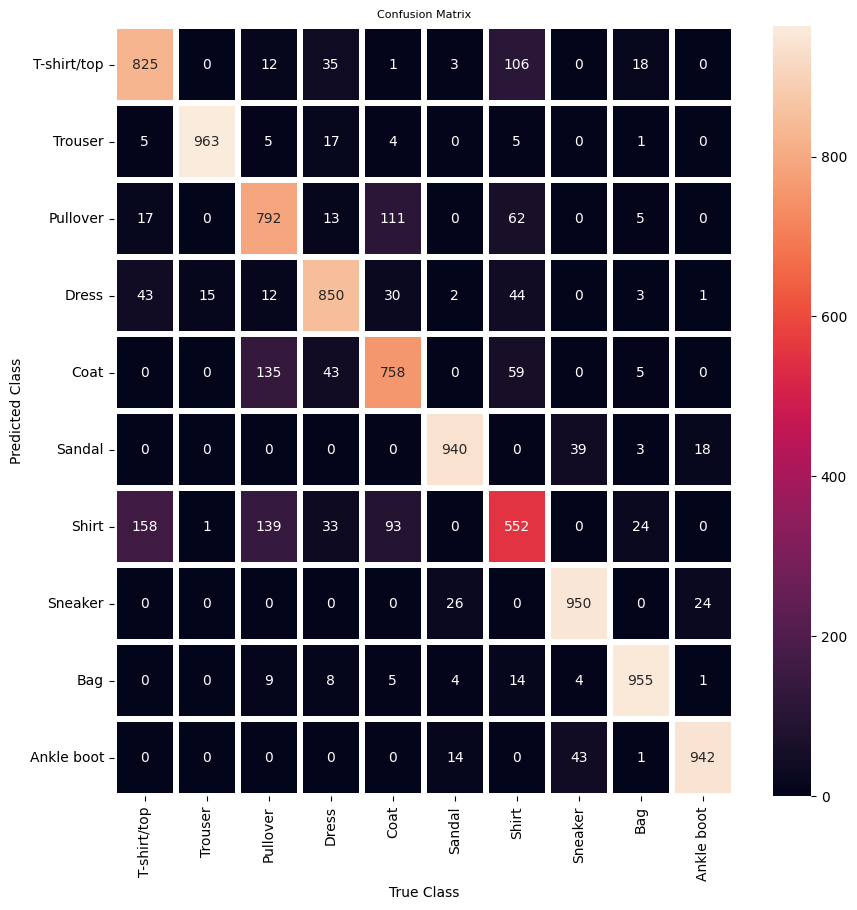

In [47]:
plot_confusion_matrix(model.neural_network.dataset)


# **Question - 8**

In [ ]:
sweep_config_que8 = {
    'method' : 'grid',
    'metric' : { 'goal' : 'maximize', 'name' : 'Accuracy'},
    'name' : 'sweep1_crossEntropy_vs_mse_final',

    'parameters' : {
        'epochs' : {'values' : [10]},
        'activation' : {'values' : ['tanh', 'ReLU']},
        'batch_size' : {'values' : [64]},
        'optimizer' : {'values' : ['momentum', 'nag', 'nadam', 'adam', 'rmsprop', 'sgd']},
        'weight_decay': {'values': [0]},
        'hidden_layer_sizes' : {'values' : [32, 64]},
        'beta': {'values': [0.9]}, #rmsprop
        'beta1' : {'values' : [0.999]},
        'beta2': {'values': [0.999]},
        'learning_rate': {'values': [1e-3, 1e-4]},
        'initialization':{'values': ['Xavier']},
        'hidden_layers': {'values': [4, 5]},
        'loss_function' : {'values' : ['cross_entropy', 'mean_squared_error']},
        'epsilon' : {'values' : [1e-6]},
        'momentum' : {'values' : [0.9]},
        'dataset' : {'values' : ['fashion_mnist']}
    }
}

In [ ]:
sweep_id_que8 = wandb.sweep(sweep_config_que8, project="DL_Assignment1")
wandb.agent(sweep_id_que8, train)
wandb.finish()

# **Question 10**

In [52]:
# Helper Function
def train_model_on_mnist(PARAM_NEURAL_NETWORK, PARAM_OPTIMIZER, batch_size, epochs):
    neural_network_mnist = Neural_Network(PARAM_NEURAL_NETWORK)
    optimizer_mnist = Optimizer(neural_network_mnist, PARAM_OPTIMIZER)

    my_model_mnist = Train_Model(neural_network_mnist, optimizer_mnist, log = 0, console = 0)
    my_model_mnist.fit_data(batch_size, epochs)
    loss, accuracy = my_model_mnist.compute_performance(my_model_mnist.neural_network.test_img, my_model_mnist.neural_network.test_true)
    print(f"Test Data Loss : {loss}, Test Data Accuracy : {accuracy}")

# Model-1

In [48]:
MODEL1_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL1_PARAM_OPTIMIZER = {
    "eta": 0.005,
    "optimizer": "sgd", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 1e-8,
    "epsilon": 1e-6,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 2

In [49]:
MODEL2_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 3,
    "hidden_layer_sizes" : 32,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL2_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "momentum", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}


# Model - 3

In [50]:
MODEL3_PARAM_NEURAL_NETWORK = {
    "hidden_layers": 4,
    "hidden_layer_sizes" : 64,
    "activation_function": "ReLU", # sigmoid, tanh, ReLU
    "dataset" : "mnist",
    "loss_function" : "cross_entropy", # mean_squared_error, cross_entropy
    "init" : "Xavier" #random, Xavier
}

MODEL3_PARAM_OPTIMIZER = {
    "eta": 0.001,
    "optimizer": "rmsprop", #sgd, momentum, adam, nadam, rmsprop, nag
    "beta": 0.9,
    "weight_decay": 0,
    "epsilon": 1e-8,
    "beta2" : 0.999,
    "beta1" : 0.999,
    "momentum" : 0.9
}

# Test Loss & Test Accuracy on MNIST_DATASET

In [53]:
# Training different Models
train_model_on_mnist(MODEL1_PARAM_NEURAL_NETWORK, MODEL1_PARAM_OPTIMIZER, 32, 10)
train_model_on_mnist(MODEL2_PARAM_NEURAL_NETWORK, MODEL2_PARAM_OPTIMIZER, 32, 10)
train_model_on_mnist(MODEL3_PARAM_NEURAL_NETWORK, MODEL3_PARAM_OPTIMIZER, 32, 10)


Test Data Loss : 0.1838192928817245, Test Data Accuracy : 94.08999999999999
